<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/deepnet_mol2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mol2vec Feature Based Classification Modeling

## Introduction
Mol2vec is  a representation of molecular substructure. Embedding of substructures  is generated through unsupervised learning  and this vector representation of molecular substructure in a similar direction is combined to represent a compound. Mol2Vec is dense representation and shown to overcome sparseness and bit collison(Jaeger et al., 2018).


## Data loading and Preprocessing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install deepchem
import deepchem as dc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 16.5 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


## Primary dataset

Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL database(ID:ChEMBL22).

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head()

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df['classLabel'].value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

In [ ]:
df['classLabel']=df['IC50'].apply(lambda x: 1 if x<=1000 else 0)
df.head()

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df['classLabel'].value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

In [ ]:
df_selected= df[['Smiles', 'classLabel']]
df_selected

,Smiles,classLabel
0,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1
1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,1
2,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,0
3,Cc1ccc2c(N)c3c(nc2c1)CCCC3,1
4,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,1
...,...,...
4072,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,1
4073,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],0
4074,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],0
4075,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],1


## Feature Generation -- Mol2Vec

In [ ]:
!pip install rdkit

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

In [ ]:
df.to_csv('inhibitor.csv', index=False)

In [ ]:
dataset_file = 'inhibitor.csv'
task = ['classLabel']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
splitter = dc.splits.RandomSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
  dataset=dataset, frac_train=0.6, frac_valid=0.2, frac_test=0.2
)
print(len(train_dataset))
print(len(valid_dataset))
print(len(test_dataset))

2446
815
816


In [ ]:
train_dataset.X

array([[  1.0413204 ,  -2.6457224 ,  -2.0567644 , ...,  -1.6533391 ,
         -6.6426206 ,  -0.23557898],
       [  5.769902  ,  -4.8295927 ,  -6.8382235 , ...,  -3.8630881 ,
        -13.921071  ,  -0.09080541],
       [  1.141745  ,  -6.2025285 ,  -2.8302462 , ..., -11.862339  ,
        -17.320078  ,  -4.9489565 ],
       ...,
       [  0.14418706,  -1.2917762 ,  -1.3636804 , ...,  -0.84793144,
         -3.91106   ,  -1.2241167 ],
       [ -0.5409313 ,  -3.5473347 ,  -3.0564284 , ...,  -4.678193  ,
         -9.486671  ,  -2.5669153 ],
       [  0.21266901,  -2.8661008 ,  -2.652546  , ...,  -3.48316   ,
         -7.3386903 ,  -2.4314804 ]], dtype=float32)

In [ ]:
train_dataset.y

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

## Classification modeling with deepnet architectures: ANN, CNN, LSTM, GRU, BiLSTM

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
)

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.X)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset.y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

# Reshape input data for LSTM and Bi-LSTM models
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes
num_classes = 2

# Define deep learning models
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

gru_model = Sequential([
    GRU(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bi_lstm_model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the models
for model in [ann_model, cnn_model, lstm_model, gru_model, bi_lstm_model]:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train, evaluate, and store results
results = {'Model': [], 'Validation Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [],
           'ROC-AUC': [], 'Cohen\'s Kappa': [], 'MCC': []}
for model_name, model in [('ANN', ann_model), ('CNN', cnn_model), ('LSTM', lstm_model), ('GRU', gru_model), ('Bi-LSTM', bi_lstm_model)]:
    # Define early stopping callback based on recall
    early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True)

    # Train the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_valid_lstm, y_valid),
                            callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping])

    # Evaluate the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        y_valid_pred_prob = model.predict(X_valid_lstm)
        y_test_pred_prob = model.predict(X_test_lstm)
    else:
        y_valid_pred_prob = model.predict(X_valid)
        y_test_pred_prob = model.predict(X_test)

    y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

    # Calculate evaluation metrics
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Calculate the confusion matrix
    confusion = confusion_matrix(y_test, y_test_pred)

    # Print the confusion matrix as text
    print_confusion_matrix(confusion, model_name)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Validation Accuracy:", valid_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Cohen's Kappa Score:", cohen_kappa)
    print("MCC Score:", mcc)
    print()

    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(valid_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)


Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.8600 - accuracy: 0.5720

90/90 [==============================] - 5s 11ms/step - loss: 0.8600 - accuracy: 0.5720 - val_loss: 0.6278 - val_accuracy: 0.6618
Epoch 2/100
88/90 [============================>.] - ETA: 0s - loss: 0.6762 - accuracy: 0.6058

90/90 [==============================] - 1s 8ms/step - loss: 0.6774 - accuracy: 0.6050 - val_loss: 0.6172 - val_accuracy: 0.6650
Epoch 3/100
83/90 [==========================>...] - ETA: 0s - loss: 0.6528 - accuracy: 0.6148

90/90 [==============================] - 1s 8ms/step - loss: 0.6513 - accuracy: 0.6155 - val_loss: 0.6124 - val_accuracy: 0.6830
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6224 - accuracy: 0.6628

90/90 [==============================] - 1s 7ms/step - loss: 0.6224 - accuracy: 0.6628 - val_loss: 0.5988 - val_accuracy: 0.6993
Epoch 5/100
82/90 [==========================>...] - ETA: 0s - loss: 0.5955 - accuracy: 0.6780

90/90 [==============================] - 1s 8ms/step - loss: 0.5937 - accuracy: 0.6807 - val_loss: 0.5770 - val_accuracy: 0.7092
Epoch 6/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5810 - accuracy: 0.6993

90/90 [==============================] - 1s 8ms/step - loss: 0.5804 - accuracy: 0.6982 - val_loss: 0.5638 - val_accuracy: 0.7206
Epoch 7/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5671 - accuracy: 0.7059

90/90 [==============================] - 1s 9ms/step - loss: 0.5646 - accuracy: 0.7073 - val_loss: 0.5566 - val_accuracy: 0.7353
Epoch 8/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5607 - accuracy: 0.7102

90/90 [==============================] - 1s 7ms/step - loss: 0.5640 - accuracy: 0.7098 - val_loss: 0.5430 - val_accuracy: 0.7173
Epoch 9/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.7361

90/90 [==============================] - 1s 6ms/step - loss: 0.5473 - accuracy: 0.7301 - val_loss: 0.5424 - val_accuracy: 0.7255
Epoch 10/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5189 - accuracy: 0.7449

90/90 [==============================] - 1s 9ms/step - loss: 0.5194 - accuracy: 0.7448 - val_loss: 0.5274 - val_accuracy: 0.7549
Epoch 11/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5151 - accuracy: 0.7533

90/90 [==============================] - 1s 11ms/step - loss: 0.5134 - accuracy: 0.7539 - val_loss: 0.5144 - val_accuracy: 0.7320
Epoch 12/100
89/90 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.7626

90/90 [==============================] - 1s 12ms/step - loss: 0.5081 - accuracy: 0.7624 - val_loss: 0.5041 - val_accuracy: 0.7484
Epoch 13/100
87/90 [============================>.] - ETA: 0s - loss: 0.5074 - accuracy: 0.7522

90/90 [==============================] - 1s 11ms/step - loss: 0.5069 - accuracy: 0.7529 - val_loss: 0.5001 - val_accuracy: 0.7614
Epoch 14/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4788 - accuracy: 0.7783

90/90 [==============================] - 1s 11ms/step - loss: 0.4812 - accuracy: 0.7778 - val_loss: 0.4899 - val_accuracy: 0.7631
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.4784 - accuracy: 0.7746

90/90 [==============================] - 1s 8ms/step - loss: 0.4784 - accuracy: 0.7746 - val_loss: 0.4937 - val_accuracy: 0.7712
Epoch 16/100
88/90 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.7852

90/90 [==============================] - 1s 7ms/step - loss: 0.4714 - accuracy: 0.7827 - val_loss: 0.4960 - val_accuracy: 0.7794
Epoch 17/100
87/90 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.7870

90/90 [==============================] - 1s 8ms/step - loss: 0.4599 - accuracy: 0.7879 - val_loss: 0.4875 - val_accuracy: 0.7843
Epoch 18/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4711 - accuracy: 0.7812

90/90 [==============================] - 1s 7ms/step - loss: 0.4672 - accuracy: 0.7837 - val_loss: 0.4857 - val_accuracy: 0.7794
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.4525 - accuracy: 0.7995

90/90 [==============================] - 1s 8ms/step - loss: 0.4525 - accuracy: 0.7995 - val_loss: 0.4699 - val_accuracy: 0.7827
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.4379 - accuracy: 0.8044

90/90 [==============================] - 1s 9ms/step - loss: 0.4379 - accuracy: 0.8044 - val_loss: 0.4884 - val_accuracy: 0.7843
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.8058

90/90 [==============================] - 1s 9ms/step - loss: 0.4550 - accuracy: 0.8058 - val_loss: 0.4657 - val_accuracy: 0.7908
Epoch 22/100
87/90 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.8064

90/90 [==============================] - 1s 9ms/step - loss: 0.4338 - accuracy: 0.8058 - val_loss: 0.4603 - val_accuracy: 0.7925
Epoch 23/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4302 - accuracy: 0.8143

90/90 [==============================] - 1s 9ms/step - loss: 0.4289 - accuracy: 0.8149 - val_loss: 0.4700 - val_accuracy: 0.7974
Epoch 24/100
88/90 [============================>.] - ETA: 0s - loss: 0.4237 - accuracy: 0.8121

90/90 [==============================] - 1s 9ms/step - loss: 0.4219 - accuracy: 0.8128 - val_loss: 0.4696 - val_accuracy: 0.7925
Epoch 25/100
88/90 [============================>.] - ETA: 0s - loss: 0.4253 - accuracy: 0.8161

90/90 [==============================] - 1s 8ms/step - loss: 0.4262 - accuracy: 0.8149 - val_loss: 0.4655 - val_accuracy: 0.8007
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.4119 - accuracy: 0.8202

90/90 [==============================] - 1s 8ms/step - loss: 0.4119 - accuracy: 0.8202 - val_loss: 0.4588 - val_accuracy: 0.8023
Epoch 27/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4114 - accuracy: 0.8245

90/90 [==============================] - 1s 8ms/step - loss: 0.4119 - accuracy: 0.8226 - val_loss: 0.4537 - val_accuracy: 0.8121
Epoch 28/100
80/90 [=========================>....] - ETA: 0s - loss: 0.4050 - accuracy: 0.8242

90/90 [==============================] - 1s 7ms/step - loss: 0.4111 - accuracy: 0.8209 - val_loss: 0.4539 - val_accuracy: 0.8007
Epoch 29/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3803 - accuracy: 0.8321

90/90 [==============================] - 1s 11ms/step - loss: 0.3853 - accuracy: 0.8286 - val_loss: 0.4541 - val_accuracy: 0.8039
Epoch 30/100
87/90 [============================>.] - ETA: 0s - loss: 0.4000 - accuracy: 0.8290

90/90 [==============================] - 1s 11ms/step - loss: 0.4034 - accuracy: 0.8261 - val_loss: 0.4533 - val_accuracy: 0.8072
Epoch 31/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4033 - accuracy: 0.8289

90/90 [==============================] - 1s 10ms/step - loss: 0.4030 - accuracy: 0.8293 - val_loss: 0.4567 - val_accuracy: 0.8121
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8314

90/90 [==============================] - 1s 11ms/step - loss: 0.3857 - accuracy: 0.8314 - val_loss: 0.4637 - val_accuracy: 0.8039
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8402

90/90 [==============================] - 1s 13ms/step - loss: 0.3924 - accuracy: 0.8402 - val_loss: 0.4685 - val_accuracy: 0.8023
Epoch 34/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3880 - accuracy: 0.8325

90/90 [==============================] - 1s 12ms/step - loss: 0.3838 - accuracy: 0.8363 - val_loss: 0.4636 - val_accuracy: 0.7990
Epoch 35/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3796 - accuracy: 0.8336

90/90 [==============================] - 1s 10ms/step - loss: 0.3756 - accuracy: 0.8370 - val_loss: 0.4583 - val_accuracy: 0.8121
Epoch 36/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3836 - accuracy: 0.8423

90/90 [==============================] - 1s 10ms/step - loss: 0.3854 - accuracy: 0.8409 - val_loss: 0.4536 - val_accuracy: 0.8039
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.3779 - accuracy: 0.8440

90/90 [==============================] - 1s 8ms/step - loss: 0.3779 - accuracy: 0.8440 - val_loss: 0.4458 - val_accuracy: 0.8154
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.3719 - accuracy: 0.8433

90/90 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8433 - val_loss: 0.4365 - val_accuracy: 0.8170
Epoch 39/100
79/90 [=========================>....] - ETA: 0s - loss: 0.3719 - accuracy: 0.8402

90/90 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.8402 - val_loss: 0.4433 - val_accuracy: 0.8039
Epoch 40/100
88/90 [============================>.] - ETA: 0s - loss: 0.3676 - accuracy: 0.8516

90/90 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.8510 - val_loss: 0.4773 - val_accuracy: 0.7958
Epoch 41/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3514 - accuracy: 0.8519

90/90 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8496 - val_loss: 0.4445 - val_accuracy: 0.8121
Epoch 42/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3674 - accuracy: 0.8442

90/90 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8486 - val_loss: 0.4457 - val_accuracy: 0.8072
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8549

90/90 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.8549 - val_loss: 0.4575 - val_accuracy: 0.8023
Epoch 44/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3484 - accuracy: 0.8527

90/90 [==============================] - 0s 4ms/step - loss: 0.3543 - accuracy: 0.8482 - val_loss: 0.4636 - val_accuracy: 0.8023
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.3481 - accuracy: 0.8584

90/90 [==============================] - 0s 4ms/step - loss: 0.3481 - accuracy: 0.8584 - val_loss: 0.4415 - val_accuracy: 0.8023
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.3506 - accuracy: 0.8501

90/90 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8500 - val_loss: 0.4672 - val_accuracy: 0.8219
Epoch 47/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3317 - accuracy: 0.8632

90/90 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.8594 - val_loss: 0.4724 - val_accuracy: 0.8121
Epoch 48/100
79/90 [=========================>....] - ETA: 0s - loss: 0.3286 - accuracy: 0.8639

90/90 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8637 - val_loss: 0.4535 - val_accuracy: 0.8219
Epoch 49/100
79/90 [=========================>....] - ETA: 0s - loss: 0.3279 - accuracy: 0.8592

90/90 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8563 - val_loss: 0.4757 - val_accuracy: 0.8039
Epoch 50/100
79/90 [=========================>....] - ETA: 0s - loss: 0.3444 - accuracy: 0.8560

90/90 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.8559 - val_loss: 0.4788 - val_accuracy: 0.8056
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.3373 - accuracy: 0.8566

90/90 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.8566 - val_loss: 0.4586 - val_accuracy: 0.8039
Epoch 52/100
78/90 [=========================>....] - ETA: 0s - loss: 0.3391 - accuracy: 0.8534

90/90 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.8573 - val_loss: 0.4487 - val_accuracy: 0.8203
Epoch 53/100
76/90 [========================>.....] - ETA: 0s - loss: 0.3329 - accuracy: 0.8532

90/90 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8601 - val_loss: 0.4721 - val_accuracy: 0.8088
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.3476 - accuracy: 0.8567

90/90 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 0.8570 - val_loss: 0.4576 - val_accuracy: 0.8056
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.3274 - accuracy: 0.8612

90/90 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8612 - val_loss: 0.4728 - val_accuracy: 0.8137
Epoch 56/100
76/90 [========================>.....] - ETA: 0s - loss: 0.3280 - accuracy: 0.8586

90/90 [==============================] - 0s 4ms/step - loss: 0.3271 - accuracy: 0.8619 - val_loss: 0.4487 - val_accuracy: 0.8170
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.3246 - accuracy: 0.8608

90/90 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8608 - val_loss: 0.5073 - val_accuracy: 0.7892
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8626

90/90 [==============================] - 1s 7ms/step - loss: 0.3295 - accuracy: 0.8626 - val_loss: 0.4563 - val_accuracy: 0.7974
Epoch 59/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3051 - accuracy: 0.8779

90/90 [==============================] - 1s 6ms/step - loss: 0.3074 - accuracy: 0.8752 - val_loss: 0.4788 - val_accuracy: 0.8056
Epoch 60/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3136 - accuracy: 0.8687

90/90 [==============================] - 1s 6ms/step - loss: 0.3112 - accuracy: 0.8696 - val_loss: 0.4681 - val_accuracy: 0.8186
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8697

90/90 [==============================] - 1s 6ms/step - loss: 0.3117 - accuracy: 0.8700 - val_loss: 0.4702 - val_accuracy: 0.8219
Epoch 62/100
87/90 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8746

90/90 [==============================] - 1s 6ms/step - loss: 0.3129 - accuracy: 0.8745 - val_loss: 0.4557 - val_accuracy: 0.8154
Epoch 63/100
87/90 [============================>.] - ETA: 0s - loss: 0.3079 - accuracy: 0.8710

90/90 [==============================] - 1s 6ms/step - loss: 0.3074 - accuracy: 0.8721 - val_loss: 0.4889 - val_accuracy: 0.8137
Epoch 64/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3126 - accuracy: 0.8698

90/90 [==============================] - 1s 6ms/step - loss: 0.3105 - accuracy: 0.8696 - val_loss: 0.4876 - val_accuracy: 0.8137
Epoch 65/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3123 - accuracy: 0.8738

90/90 [==============================] - 1s 6ms/step - loss: 0.3077 - accuracy: 0.8742 - val_loss: 0.4746 - val_accuracy: 0.8088
Epoch 66/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3100 - accuracy: 0.8789

90/90 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.8780 - val_loss: 0.4715 - val_accuracy: 0.8105
Epoch 67/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2961 - accuracy: 0.8766

90/90 [==============================] - 0s 4ms/step - loss: 0.2928 - accuracy: 0.8763 - val_loss: 0.5145 - val_accuracy: 0.8088
Epoch 68/100
77/90 [========================>.....] - ETA: 0s - loss: 0.3007 - accuracy: 0.8750

90/90 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.8731 - val_loss: 0.4822 - val_accuracy: 0.8105
Epoch 69/100
76/90 [========================>.....] - ETA: 0s - loss: 0.2985 - accuracy: 0.8787

90/90 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.8759 - val_loss: 0.4908 - val_accuracy: 0.8186
Epoch 70/100
78/90 [=========================>....] - ETA: 0s - loss: 0.3100 - accuracy: 0.8786

90/90 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8749 - val_loss: 0.4678 - val_accuracy: 0.8186
Epoch 71/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2858 - accuracy: 0.8790

90/90 [==============================] - 0s 4ms/step - loss: 0.2813 - accuracy: 0.8819 - val_loss: 0.5205 - val_accuracy: 0.8105
Epoch 72/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2909 - accuracy: 0.8750

90/90 [==============================] - 0s 4ms/step - loss: 0.2905 - accuracy: 0.8745 - val_loss: 0.5284 - val_accuracy: 0.7974
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.8756

90/90 [==============================] - 0s 4ms/step - loss: 0.2933 - accuracy: 0.8756 - val_loss: 0.4976 - val_accuracy: 0.8088
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.2871 - accuracy: 0.8805

90/90 [==============================] - 0s 4ms/step - loss: 0.2871 - accuracy: 0.8805 - val_loss: 0.5376 - val_accuracy: 0.8007
Epoch 75/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2987 - accuracy: 0.8714

90/90 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.8707 - val_loss: 0.5266 - val_accuracy: 0.8023
Epoch 76/100
87/90 [============================>.] - ETA: 0s - loss: 0.2838 - accuracy: 0.8836

90/90 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.8847 - val_loss: 0.5122 - val_accuracy: 0.8072
Epoch 77/100
88/90 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8800

90/90 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.8812 - val_loss: 0.4950 - val_accuracy: 0.8056
Epoch 78/100
76/90 [========================>.....] - ETA: 0s - loss: 0.2777 - accuracy: 0.8906

90/90 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8882 - val_loss: 0.4800 - val_accuracy: 0.8203
Epoch 79/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2737 - accuracy: 0.8876

90/90 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.8868 - val_loss: 0.4904 - val_accuracy: 0.8039
Epoch 80/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2865 - accuracy: 0.8834

90/90 [==============================] - 0s 4ms/step - loss: 0.2845 - accuracy: 0.8840 - val_loss: 0.4998 - val_accuracy: 0.8056
Epoch 81/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2934 - accuracy: 0.8876

90/90 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.8871 - val_loss: 0.4885 - val_accuracy: 0.7990
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.2912 - accuracy: 0.8852

90/90 [==============================] - 0s 4ms/step - loss: 0.2913 - accuracy: 0.8850 - val_loss: 0.4911 - val_accuracy: 0.8121
Epoch 83/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2749 - accuracy: 0.8856

90/90 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.8819 - val_loss: 0.4842 - val_accuracy: 0.8137
Epoch 84/100
76/90 [========================>.....] - ETA: 0s - loss: 0.2716 - accuracy: 0.8910

90/90 [==============================] - 0s 4ms/step - loss: 0.2710 - accuracy: 0.8910 - val_loss: 0.5054 - val_accuracy: 0.8186
Epoch 85/100
75/90 [========================>.....] - ETA: 0s - loss: 0.2748 - accuracy: 0.8946

90/90 [==============================] - 0s 4ms/step - loss: 0.2729 - accuracy: 0.8941 - val_loss: 0.5115 - val_accuracy: 0.8219
Epoch 86/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2728 - accuracy: 0.8834

90/90 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.8829 - val_loss: 0.5220 - val_accuracy: 0.8219
Epoch 87/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2722 - accuracy: 0.8934

90/90 [==============================] - 0s 4ms/step - loss: 0.2720 - accuracy: 0.8896 - val_loss: 0.4973 - val_accuracy: 0.8186
Epoch 88/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2557 - accuracy: 0.8945

90/90 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.8913 - val_loss: 0.5166 - val_accuracy: 0.8105
Epoch 89/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2672 - accuracy: 0.8880

90/90 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.8889 - val_loss: 0.5355 - val_accuracy: 0.8137
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8897

90/90 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.8899 - val_loss: 0.5282 - val_accuracy: 0.8039
Epoch 91/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2451 - accuracy: 0.8974

90/90 [==============================] - 0s 4ms/step - loss: 0.2479 - accuracy: 0.8945 - val_loss: 0.5113 - val_accuracy: 0.8105
Epoch 92/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2922 - accuracy: 0.8799

90/90 [==============================] - 1s 6ms/step - loss: 0.2905 - accuracy: 0.8812 - val_loss: 0.4984 - val_accuracy: 0.8105
Epoch 93/100
80/90 [=========================>....] - ETA: 0s - loss: 0.2769 - accuracy: 0.8781

90/90 [==============================] - 1s 6ms/step - loss: 0.2728 - accuracy: 0.8819 - val_loss: 0.5158 - val_accuracy: 0.8105
Epoch 94/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2703 - accuracy: 0.8853

90/90 [==============================] - 1s 6ms/step - loss: 0.2683 - accuracy: 0.8868 - val_loss: 0.4914 - val_accuracy: 0.8170
Epoch 95/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2755 - accuracy: 0.8904

90/90 [==============================] - 1s 6ms/step - loss: 0.2747 - accuracy: 0.8899 - val_loss: 0.4928 - val_accuracy: 0.8203
Epoch 96/100
88/90 [============================>.] - ETA: 0s - loss: 0.2678 - accuracy: 0.8853

90/90 [==============================] - 1s 7ms/step - loss: 0.2689 - accuracy: 0.8857 - val_loss: 0.5346 - val_accuracy: 0.8268
Epoch 97/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2640 - accuracy: 0.8927

90/90 [==============================] - 1s 6ms/step - loss: 0.2666 - accuracy: 0.8920 - val_loss: 0.5294 - val_accuracy: 0.8170
Epoch 98/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2684 - accuracy: 0.8968

90/90 [==============================] - 1s 6ms/step - loss: 0.2660 - accuracy: 0.8987 - val_loss: 0.5090 - val_accuracy: 0.8088
Epoch 99/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2575 - accuracy: 0.8993

90/90 [==============================] - 1s 6ms/step - loss: 0.2620 - accuracy: 0.8991 - val_loss: 0.5169 - val_accuracy: 0.8137
Epoch 100/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2532 - accuracy: 0.8954

20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[300  64]
[ 35 213]
Model: ANN
Validation Accuracy: 0.815359477124183
Test Accuracy: 0.8382352941176471
Precision: 0.7689530685920578
Recall: 0.8588709677419355
F1 Score: 0.8114285714285715
ROC-AUC Score: 0.8415233959588798
Cohen's Kappa Score: 0.6705526676381669
MCC Score: 0.6736971344558863

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5475

90/90 [==============================] - 5s 12ms/step - loss: 0.6918 - accuracy: 0.5475 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 2/100
80/90 [=========================>....] - ETA: 0s - loss: 0.6830 - accuracy: 0.5477

90/90 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5531 - val_loss: 0.6630 - val_accuracy: 0.5948
Epoch 3/100
83/90 [==========================>...] - ETA: 0s - loss: 0.6726 - accuracy: 0.5764

90/90 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.5780 - val_loss: 0.6589 - val_accuracy: 0.6781
Epoch 4/100
82/90 [==========================>...] - ETA: 0s - loss: 0.6373 - accuracy: 0.6124

90/90 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6151 - val_loss: 0.6213 - val_accuracy: 0.6552
Epoch 5/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5876 - accuracy: 0.6827

90/90 [==============================] - 1s 6ms/step - loss: 0.5843 - accuracy: 0.6842 - val_loss: 0.6096 - val_accuracy: 0.6487
Epoch 6/100
80/90 [=========================>....] - ETA: 0s - loss: 0.5561 - accuracy: 0.7211

90/90 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.7220 - val_loss: 0.5488 - val_accuracy: 0.7418
Epoch 7/100
82/90 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7275

90/90 [==============================] - 0s 5ms/step - loss: 0.5324 - accuracy: 0.7280 - val_loss: 0.5673 - val_accuracy: 0.7075
Epoch 8/100
87/90 [============================>.] - ETA: 0s - loss: 0.5030 - accuracy: 0.7633

90/90 [==============================] - 1s 6ms/step - loss: 0.5034 - accuracy: 0.7638 - val_loss: 0.5322 - val_accuracy: 0.7582
Epoch 9/100
79/90 [=========================>....] - ETA: 0s - loss: 0.4836 - accuracy: 0.7848

90/90 [==============================] - 0s 5ms/step - loss: 0.4851 - accuracy: 0.7848 - val_loss: 0.5493 - val_accuracy: 0.7451
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.4611 - accuracy: 0.7974

90/90 [==============================] - 1s 6ms/step - loss: 0.4610 - accuracy: 0.7974 - val_loss: 0.5147 - val_accuracy: 0.7810
Epoch 11/100
80/90 [=========================>....] - ETA: 0s - loss: 0.4313 - accuracy: 0.8145

90/90 [==============================] - 1s 6ms/step - loss: 0.4434 - accuracy: 0.8083 - val_loss: 0.5258 - val_accuracy: 0.7647
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.4232 - accuracy: 0.8170

90/90 [==============================] - 1s 6ms/step - loss: 0.4232 - accuracy: 0.8170 - val_loss: 0.5416 - val_accuracy: 0.7418
Epoch 13/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4212 - accuracy: 0.8197

90/90 [==============================] - 0s 5ms/step - loss: 0.4213 - accuracy: 0.8202 - val_loss: 0.5115 - val_accuracy: 0.7680
Epoch 14/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3880 - accuracy: 0.8535

90/90 [==============================] - 0s 5ms/step - loss: 0.3900 - accuracy: 0.8507 - val_loss: 0.5238 - val_accuracy: 0.7549
Epoch 15/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3669 - accuracy: 0.8542

90/90 [==============================] - 0s 6ms/step - loss: 0.3656 - accuracy: 0.8538 - val_loss: 0.5082 - val_accuracy: 0.7859
Epoch 16/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3629 - accuracy: 0.8562

90/90 [==============================] - 1s 6ms/step - loss: 0.3712 - accuracy: 0.8521 - val_loss: 0.5472 - val_accuracy: 0.7500
Epoch 17/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3412 - accuracy: 0.8662

90/90 [==============================] - 0s 5ms/step - loss: 0.3439 - accuracy: 0.8637 - val_loss: 0.5041 - val_accuracy: 0.7745
Epoch 18/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3859 - accuracy: 0.8488

90/90 [==============================] - 0s 5ms/step - loss: 0.3780 - accuracy: 0.8528 - val_loss: 0.5228 - val_accuracy: 0.7892
Epoch 19/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3183 - accuracy: 0.8813

90/90 [==============================] - 1s 6ms/step - loss: 0.3219 - accuracy: 0.8791 - val_loss: 0.5028 - val_accuracy: 0.7827
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.3025 - accuracy: 0.8890

90/90 [==============================] - 1s 6ms/step - loss: 0.3025 - accuracy: 0.8892 - val_loss: 0.5158 - val_accuracy: 0.7892
Epoch 21/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3075 - accuracy: 0.8806

90/90 [==============================] - 1s 7ms/step - loss: 0.3085 - accuracy: 0.8812 - val_loss: 0.5639 - val_accuracy: 0.7696
Epoch 22/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2843 - accuracy: 0.8961

90/90 [==============================] - 1s 8ms/step - loss: 0.2836 - accuracy: 0.8962 - val_loss: 0.5522 - val_accuracy: 0.7778
Epoch 23/100
88/90 [============================>.] - ETA: 0s - loss: 0.2921 - accuracy: 0.8800

90/90 [==============================] - 1s 8ms/step - loss: 0.2916 - accuracy: 0.8805 - val_loss: 0.5298 - val_accuracy: 0.7859
Epoch 24/100
88/90 [============================>.] - ETA: 0s - loss: 0.2782 - accuracy: 0.8956

90/90 [==============================] - 1s 8ms/step - loss: 0.2792 - accuracy: 0.8948 - val_loss: 0.5106 - val_accuracy: 0.7892
Epoch 25/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2676 - accuracy: 0.9081

90/90 [==============================] - 1s 9ms/step - loss: 0.2702 - accuracy: 0.9064 - val_loss: 0.5592 - val_accuracy: 0.7810
Epoch 26/100
87/90 [============================>.] - ETA: 0s - loss: 0.2466 - accuracy: 0.9102

90/90 [==============================] - 1s 6ms/step - loss: 0.2467 - accuracy: 0.9103 - val_loss: 0.5952 - val_accuracy: 0.7876
Epoch 27/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2729 - accuracy: 0.8965

90/90 [==============================] - 0s 5ms/step - loss: 0.2698 - accuracy: 0.8977 - val_loss: 0.5521 - val_accuracy: 0.7859
Epoch 28/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2490 - accuracy: 0.9136

90/90 [==============================] - 0s 5ms/step - loss: 0.2503 - accuracy: 0.9113 - val_loss: 0.6411 - val_accuracy: 0.7663
Epoch 29/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2179 - accuracy: 0.9236

90/90 [==============================] - 0s 5ms/step - loss: 0.2139 - accuracy: 0.9250 - val_loss: 0.6690 - val_accuracy: 0.7810
Epoch 30/100
88/90 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9208

90/90 [==============================] - 0s 5ms/step - loss: 0.2122 - accuracy: 0.9208 - val_loss: 0.6880 - val_accuracy: 0.7696
Epoch 31/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2198 - accuracy: 0.9225

90/90 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.9225 - val_loss: 0.6147 - val_accuracy: 0.7908
Epoch 32/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2025 - accuracy: 0.9310

90/90 [==============================] - 1s 6ms/step - loss: 0.2003 - accuracy: 0.9324 - val_loss: 0.6346 - val_accuracy: 0.7941
Epoch 33/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1929 - accuracy: 0.9305

90/90 [==============================] - 1s 6ms/step - loss: 0.1943 - accuracy: 0.9313 - val_loss: 0.5998 - val_accuracy: 0.7876
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.1835 - accuracy: 0.9366

90/90 [==============================] - 1s 6ms/step - loss: 0.1835 - accuracy: 0.9366 - val_loss: 0.6304 - val_accuracy: 0.8105
Epoch 35/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2002 - accuracy: 0.9306

90/90 [==============================] - 1s 6ms/step - loss: 0.2070 - accuracy: 0.9271 - val_loss: 0.6827 - val_accuracy: 0.7761
Epoch 36/100
87/90 [============================>.] - ETA: 0s - loss: 0.1857 - accuracy: 0.9368

90/90 [==============================] - 1s 6ms/step - loss: 0.1874 - accuracy: 0.9348 - val_loss: 0.7659 - val_accuracy: 0.7680
Epoch 37/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1985 - accuracy: 0.9299

90/90 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.9281 - val_loss: 0.5906 - val_accuracy: 0.7958
Epoch 38/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1549 - accuracy: 0.9505

90/90 [==============================] - 1s 6ms/step - loss: 0.1625 - accuracy: 0.9474 - val_loss: 0.6548 - val_accuracy: 0.7941
Epoch 39/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1633 - accuracy: 0.9478

90/90 [==============================] - 0s 5ms/step - loss: 0.1851 - accuracy: 0.9401 - val_loss: 0.6514 - val_accuracy: 0.8039
Epoch 40/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1659 - accuracy: 0.9439

90/90 [==============================] - 1s 6ms/step - loss: 0.1653 - accuracy: 0.9436 - val_loss: 0.7389 - val_accuracy: 0.7859
Epoch 41/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1640 - accuracy: 0.9423

90/90 [==============================] - 0s 5ms/step - loss: 0.1649 - accuracy: 0.9429 - val_loss: 0.7045 - val_accuracy: 0.7990
Epoch 42/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1638 - accuracy: 0.9449

90/90 [==============================] - 0s 5ms/step - loss: 0.1677 - accuracy: 0.9432 - val_loss: 0.6633 - val_accuracy: 0.7892
Epoch 43/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1313 - accuracy: 0.9576

90/90 [==============================] - 0s 5ms/step - loss: 0.1327 - accuracy: 0.9565 - val_loss: 0.7846 - val_accuracy: 0.7892
Epoch 44/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1291 - accuracy: 0.9601

90/90 [==============================] - 0s 5ms/step - loss: 0.1268 - accuracy: 0.9607 - val_loss: 0.9326 - val_accuracy: 0.7761
Epoch 45/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1696 - accuracy: 0.9371

90/90 [==============================] - 1s 6ms/step - loss: 0.1736 - accuracy: 0.9366 - val_loss: 0.7677 - val_accuracy: 0.7958
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9544

90/90 [==============================] - 1s 8ms/step - loss: 0.1307 - accuracy: 0.9544 - val_loss: 0.8858 - val_accuracy: 0.7843
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9537

90/90 [==============================] - 1s 7ms/step - loss: 0.1328 - accuracy: 0.9537 - val_loss: 0.9294 - val_accuracy: 0.7598
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.9527

90/90 [==============================] - 1s 9ms/step - loss: 0.1359 - accuracy: 0.9527 - val_loss: 0.9095 - val_accuracy: 0.7729
Epoch 49/100
89/90 [============================>.] - ETA: 0s - loss: 0.1211 - accuracy: 0.9547

90/90 [==============================] - 1s 8ms/step - loss: 0.1209 - accuracy: 0.9548 - val_loss: 0.8701 - val_accuracy: 0.7876
Epoch 50/100
87/90 [============================>.] - ETA: 0s - loss: 0.1345 - accuracy: 0.9555

90/90 [==============================] - 1s 9ms/step - loss: 0.1350 - accuracy: 0.9555 - val_loss: 0.7413 - val_accuracy: 0.7876
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.9565

90/90 [==============================] - 1s 7ms/step - loss: 0.1297 - accuracy: 0.9565 - val_loss: 0.7863 - val_accuracy: 0.7958
Epoch 52/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1221 - accuracy: 0.9603

90/90 [==============================] - 0s 5ms/step - loss: 0.1232 - accuracy: 0.9600 - val_loss: 0.8722 - val_accuracy: 0.7908
Epoch 53/100
88/90 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9570

90/90 [==============================] - 0s 5ms/step - loss: 0.1197 - accuracy: 0.9572 - val_loss: 0.9360 - val_accuracy: 0.7925
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.1531 - accuracy: 0.9431

90/90 [==============================] - 1s 6ms/step - loss: 0.1530 - accuracy: 0.9432 - val_loss: 0.8072 - val_accuracy: 0.7925
Epoch 55/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1024 - accuracy: 0.9668

90/90 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 0.9628 - val_loss: 0.8088 - val_accuracy: 0.7892
Epoch 56/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0996 - accuracy: 0.9641

90/90 [==============================] - 0s 5ms/step - loss: 0.1034 - accuracy: 0.9625 - val_loss: 1.0611 - val_accuracy: 0.7745
Epoch 57/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0917 - accuracy: 0.9711

90/90 [==============================] - 0s 5ms/step - loss: 0.0980 - accuracy: 0.9678 - val_loss: 0.9325 - val_accuracy: 0.7827
Epoch 58/100
84/90 [===========================>..] - ETA: 0s - loss: 0.0964 - accuracy: 0.9699

90/90 [==============================] - 0s 5ms/step - loss: 0.1111 - accuracy: 0.9660 - val_loss: 1.1720 - val_accuracy: 0.7271
Epoch 59/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1383 - accuracy: 0.9441

90/90 [==============================] - 0s 5ms/step - loss: 0.1428 - accuracy: 0.9429 - val_loss: 1.0791 - val_accuracy: 0.7729
Epoch 60/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1275 - accuracy: 0.9539

90/90 [==============================] - 0s 6ms/step - loss: 0.1295 - accuracy: 0.9534 - val_loss: 1.0269 - val_accuracy: 0.7892
Epoch 61/100
87/90 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9666

90/90 [==============================] - 1s 6ms/step - loss: 0.0986 - accuracy: 0.9667 - val_loss: 1.0093 - val_accuracy: 0.7810
Epoch 62/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1242 - accuracy: 0.9520

90/90 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.9520 - val_loss: 0.8437 - val_accuracy: 0.8039
Epoch 63/100
81/90 [==========================>...] - ETA: 0s - loss: 0.0921 - accuracy: 0.9695

90/90 [==============================] - 0s 5ms/step - loss: 0.1015 - accuracy: 0.9660 - val_loss: 1.1600 - val_accuracy: 0.7386
Epoch 64/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1257 - accuracy: 0.9544

90/90 [==============================] - 0s 5ms/step - loss: 0.1249 - accuracy: 0.9555 - val_loss: 1.0613 - val_accuracy: 0.7761
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9695

90/90 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 0.9695 - val_loss: 1.3063 - val_accuracy: 0.7712
Epoch 66/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1124 - accuracy: 0.9630

90/90 [==============================] - 0s 5ms/step - loss: 0.1219 - accuracy: 0.9604 - val_loss: 0.9015 - val_accuracy: 0.8023
Epoch 67/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1524 - accuracy: 0.9398

90/90 [==============================] - 0s 5ms/step - loss: 0.1540 - accuracy: 0.9411 - val_loss: 0.8284 - val_accuracy: 0.7810
Epoch 68/100
81/90 [==========================>...] - ETA: 0s - loss: 0.0959 - accuracy: 0.9657

90/90 [==============================] - 0s 5ms/step - loss: 0.0926 - accuracy: 0.9667 - val_loss: 1.0279 - val_accuracy: 0.7941
Epoch 69/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1043 - accuracy: 0.9613

90/90 [==============================] - 1s 6ms/step - loss: 0.1056 - accuracy: 0.9607 - val_loss: 1.0986 - val_accuracy: 0.7565
Epoch 70/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1031 - accuracy: 0.9627

90/90 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.9625 - val_loss: 1.0646 - val_accuracy: 0.8039
Epoch 71/100
84/90 [===========================>..] - ETA: 0s - loss: 0.0724 - accuracy: 0.9747

90/90 [==============================] - 1s 6ms/step - loss: 0.0742 - accuracy: 0.9744 - val_loss: 1.1481 - val_accuracy: 0.7974
Epoch 72/100
86/90 [===========================>..] - ETA: 0s - loss: 0.0957 - accuracy: 0.9626

90/90 [==============================] - 1s 7ms/step - loss: 0.0970 - accuracy: 0.9625 - val_loss: 1.2008 - val_accuracy: 0.7958
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.1212 - accuracy: 0.9603

90/90 [==============================] - 1s 8ms/step - loss: 0.1210 - accuracy: 0.9604 - val_loss: 1.1495 - val_accuracy: 0.7827
Epoch 74/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1242 - accuracy: 0.9585

90/90 [==============================] - 1s 7ms/step - loss: 0.1237 - accuracy: 0.9586 - val_loss: 0.9192 - val_accuracy: 0.7925
Epoch 75/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1084 - accuracy: 0.9608

90/90 [==============================] - 1s 8ms/step - loss: 0.1099 - accuracy: 0.9600 - val_loss: 0.9488 - val_accuracy: 0.7859
Epoch 76/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1231 - accuracy: 0.9535

90/90 [==============================] - 1s 10ms/step - loss: 0.1199 - accuracy: 0.9541 - val_loss: 1.0617 - val_accuracy: 0.7941
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.0666 - accuracy: 0.9782

90/90 [==============================] - 1s 6ms/step - loss: 0.0668 - accuracy: 0.9779 - val_loss: 1.3552 - val_accuracy: 0.7843
Epoch 78/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1238 - accuracy: 0.9568

90/90 [==============================] - 1s 6ms/step - loss: 0.1228 - accuracy: 0.9569 - val_loss: 1.1214 - val_accuracy: 0.8088
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.1069 - accuracy: 0.9639

90/90 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9639 - val_loss: 1.0704 - val_accuracy: 0.7827
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.0882 - accuracy: 0.9660

90/90 [==============================] - 0s 5ms/step - loss: 0.0882 - accuracy: 0.9660 - val_loss: 1.0242 - val_accuracy: 0.7876
Epoch 81/100
82/90 [==========================>...] - ETA: 0s - loss: 0.0717 - accuracy: 0.9760

90/90 [==============================] - 0s 5ms/step - loss: 0.0757 - accuracy: 0.9748 - val_loss: 1.0987 - val_accuracy: 0.7908
Epoch 82/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0779 - accuracy: 0.9766

90/90 [==============================] - 1s 6ms/step - loss: 0.0811 - accuracy: 0.9758 - val_loss: 0.9650 - val_accuracy: 0.7925
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.0723 - accuracy: 0.9762

90/90 [==============================] - 0s 5ms/step - loss: 0.0723 - accuracy: 0.9762 - val_loss: 1.2070 - val_accuracy: 0.7827
Epoch 84/100
82/90 [==========================>...] - ETA: 0s - loss: 0.0901 - accuracy: 0.9672

90/90 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9674 - val_loss: 1.4240 - val_accuracy: 0.7631
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.0979 - accuracy: 0.9677

90/90 [==============================] - 1s 6ms/step - loss: 0.0977 - accuracy: 0.9678 - val_loss: 1.0144 - val_accuracy: 0.7892
Epoch 86/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1007 - accuracy: 0.9688

90/90 [==============================] - 0s 5ms/step - loss: 0.1026 - accuracy: 0.9671 - val_loss: 1.1216 - val_accuracy: 0.7778
Epoch 87/100
79/90 [=========================>....] - ETA: 0s - loss: 0.0889 - accuracy: 0.9608

90/90 [==============================] - 1s 6ms/step - loss: 0.1035 - accuracy: 0.9562 - val_loss: 0.9988 - val_accuracy: 0.7958
Epoch 88/100
81/90 [==========================>...] - ETA: 0s - loss: 0.0782 - accuracy: 0.9722

90/90 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9734 - val_loss: 1.2134 - val_accuracy: 0.7908
Epoch 89/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0749 - accuracy: 0.9723

90/90 [==============================] - 0s 5ms/step - loss: 0.0742 - accuracy: 0.9720 - val_loss: 1.1754 - val_accuracy: 0.8007
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9758

90/90 [==============================] - 1s 6ms/step - loss: 0.0672 - accuracy: 0.9758 - val_loss: 1.2447 - val_accuracy: 0.7729
Epoch 91/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1172 - accuracy: 0.9559

90/90 [==============================] - 1s 6ms/step - loss: 0.1144 - accuracy: 0.9576 - val_loss: 1.1187 - val_accuracy: 0.7892
Epoch 92/100
80/90 [=========================>....] - ETA: 0s - loss: 0.0636 - accuracy: 0.9770

90/90 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9776 - val_loss: 1.2487 - val_accuracy: 0.7925
Epoch 93/100
83/90 [==========================>...] - ETA: 0s - loss: 0.0588 - accuracy: 0.9800

90/90 [==============================] - 1s 6ms/step - loss: 0.0568 - accuracy: 0.9807 - val_loss: 1.2822 - val_accuracy: 0.7843
Epoch 94/100
81/90 [==========================>...] - ETA: 0s - loss: 0.0592 - accuracy: 0.9772

90/90 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9762 - val_loss: 1.1968 - val_accuracy: 0.7908
Epoch 95/100
81/90 [==========================>...] - ETA: 0s - loss: 0.0588 - accuracy: 0.9780

90/90 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9783 - val_loss: 1.3578 - val_accuracy: 0.7941
Epoch 96/100
82/90 [==========================>...] - ETA: 0s - loss: 0.0563 - accuracy: 0.9771

90/90 [==============================] - 1s 6ms/step - loss: 0.0554 - accuracy: 0.9779 - val_loss: 1.3043 - val_accuracy: 0.7925
Epoch 97/100
89/90 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9712

90/90 [==============================] - 1s 10ms/step - loss: 0.0745 - accuracy: 0.9713 - val_loss: 1.4701 - val_accuracy: 0.7810
Epoch 98/100
84/90 [===========================>..] - ETA: 0s - loss: 0.0816 - accuracy: 0.9732

90/90 [==============================] - 1s 15ms/step - loss: 0.0833 - accuracy: 0.9709 - val_loss: 1.2564 - val_accuracy: 0.7925
Epoch 99/100
89/90 [============================>.] - ETA: 0s - loss: 0.2334 - accuracy: 0.9154

90/90 [==============================] - 1s 16ms/step - loss: 0.2331 - accuracy: 0.9155 - val_loss: 1.1164 - val_accuracy: 0.8007
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9632

20/20 [==============================] - 0s 2ms/step
Confusion Matrix - CNN:
[273  91]
[ 39 209]
Model: CNN
Validation Accuracy: 0.7777777777777778
Test Accuracy: 0.7875816993464052
Precision: 0.6966666666666667
Recall: 0.842741935483871
F1 Score: 0.7627737226277372
ROC-AUC Score: 0.7963709677419355
Cohen's Kappa Score: 0.5735785953177257
MCC Score: 0.582108930056577

Epoch 1/100
88/90 [============================>.] - ETA: 0s - loss: 0.6643 - accuracy: 0.6037

90/90 [==============================] - 4s 20ms/step - loss: 0.6651 - accuracy: 0.6018 - val_loss: 0.6496 - val_accuracy: 0.6340
Epoch 2/100
87/90 [============================>.] - ETA: 0s - loss: 0.6388 - accuracy: 0.6390

90/90 [==============================] - 1s 14ms/step - loss: 0.6384 - accuracy: 0.6404 - val_loss: 0.6453 - val_accuracy: 0.6291
Epoch 3/100
88/90 [============================>.] - ETA: 0s - loss: 0.6304 - accuracy: 0.6435

90/90 [==============================] - 1s 14ms/step - loss: 0.6307 - accuracy: 0.6428 - val_loss: 0.6424 - val_accuracy: 0.6373
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6259 - accuracy: 0.6460

90/90 [==============================] - 1s 14ms/step - loss: 0.6259 - accuracy: 0.6460 - val_loss: 0.6543 - val_accuracy: 0.6340
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6256 - accuracy: 0.6454

90/90 [==============================] - 1s 15ms/step - loss: 0.6257 - accuracy: 0.6453 - val_loss: 0.6535 - val_accuracy: 0.6307
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6173 - accuracy: 0.6461

90/90 [==============================] - 2s 20ms/step - loss: 0.6168 - accuracy: 0.6467 - val_loss: 0.6367 - val_accuracy: 0.6275
Epoch 7/100
88/90 [============================>.] - ETA: 0s - loss: 0.6161 - accuracy: 0.6502

90/90 [==============================] - 2s 19ms/step - loss: 0.6144 - accuracy: 0.6512 - val_loss: 0.6592 - val_accuracy: 0.6291
Epoch 8/100
87/90 [============================>.] - ETA: 0s - loss: 0.6085 - accuracy: 0.6487

90/90 [==============================] - 2s 17ms/step - loss: 0.6083 - accuracy: 0.6488 - val_loss: 0.6320 - val_accuracy: 0.6356
Epoch 9/100
89/90 [============================>.] - ETA: 0s - loss: 0.6097 - accuracy: 0.6552

90/90 [==============================] - 1s 14ms/step - loss: 0.6094 - accuracy: 0.6558 - val_loss: 0.6371 - val_accuracy: 0.6258
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.6082 - accuracy: 0.6601

90/90 [==============================] - 1s 14ms/step - loss: 0.6082 - accuracy: 0.6604 - val_loss: 0.6355 - val_accuracy: 0.6307
Epoch 11/100
87/90 [============================>.] - ETA: 0s - loss: 0.6090 - accuracy: 0.6537

90/90 [==============================] - 1s 14ms/step - loss: 0.6080 - accuracy: 0.6530 - val_loss: 0.6287 - val_accuracy: 0.6373
Epoch 12/100
89/90 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.6626

90/90 [==============================] - 1s 14ms/step - loss: 0.5904 - accuracy: 0.6621 - val_loss: 0.6384 - val_accuracy: 0.6324
Epoch 13/100
89/90 [============================>.] - ETA: 0s - loss: 0.6094 - accuracy: 0.6464

90/90 [==============================] - 1s 14ms/step - loss: 0.6092 - accuracy: 0.6470 - val_loss: 0.6410 - val_accuracy: 0.6127
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.6017 - accuracy: 0.6562

90/90 [==============================] - 1s 14ms/step - loss: 0.6017 - accuracy: 0.6562 - val_loss: 0.6365 - val_accuracy: 0.6356
Epoch 15/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.6588

90/90 [==============================] - 1s 14ms/step - loss: 0.5889 - accuracy: 0.6600 - val_loss: 0.6172 - val_accuracy: 0.6324
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.5832 - accuracy: 0.6705

90/90 [==============================] - 2s 17ms/step - loss: 0.5832 - accuracy: 0.6705 - val_loss: 0.6191 - val_accuracy: 0.6471
Epoch 17/100
88/90 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.6708

90/90 [==============================] - 2s 19ms/step - loss: 0.5963 - accuracy: 0.6705 - val_loss: 0.6562 - val_accuracy: 0.6291
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6222 - accuracy: 0.6428

90/90 [==============================] - 2s 21ms/step - loss: 0.6222 - accuracy: 0.6428 - val_loss: 0.6447 - val_accuracy: 0.6258
Epoch 19/100
87/90 [============================>.] - ETA: 0s - loss: 0.6097 - accuracy: 0.6570

90/90 [==============================] - 1s 15ms/step - loss: 0.6105 - accuracy: 0.6576 - val_loss: 0.6382 - val_accuracy: 0.6373
Epoch 20/100
88/90 [============================>.] - ETA: 0s - loss: 0.6083 - accuracy: 0.6577

90/90 [==============================] - 1s 14ms/step - loss: 0.6092 - accuracy: 0.6565 - val_loss: 0.6343 - val_accuracy: 0.6438
Epoch 21/100
89/90 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.6636

90/90 [==============================] - 1s 14ms/step - loss: 0.5996 - accuracy: 0.6635 - val_loss: 0.6306 - val_accuracy: 0.6487
Epoch 22/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5850 - accuracy: 0.6664

90/90 [==============================] - 1s 14ms/step - loss: 0.5845 - accuracy: 0.6695 - val_loss: 0.6296 - val_accuracy: 0.6307
Epoch 23/100
88/90 [============================>.] - ETA: 0s - loss: 0.5872 - accuracy: 0.6665

90/90 [==============================] - 1s 14ms/step - loss: 0.5862 - accuracy: 0.6674 - val_loss: 0.6321 - val_accuracy: 0.6111
Epoch 24/100
88/90 [============================>.] - ETA: 0s - loss: 0.5751 - accuracy: 0.6719

90/90 [==============================] - 1s 14ms/step - loss: 0.5741 - accuracy: 0.6726 - val_loss: 0.6243 - val_accuracy: 0.6209
Epoch 25/100
88/90 [============================>.] - ETA: 0s - loss: 0.5783 - accuracy: 0.6641

90/90 [==============================] - 1s 14ms/step - loss: 0.5768 - accuracy: 0.6656 - val_loss: 0.6248 - val_accuracy: 0.6291
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.6761

90/90 [==============================] - 1s 14ms/step - loss: 0.5720 - accuracy: 0.6761 - val_loss: 0.6341 - val_accuracy: 0.6127
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.6891

90/90 [==============================] - 2s 21ms/step - loss: 0.5680 - accuracy: 0.6891 - val_loss: 0.6194 - val_accuracy: 0.6225
Epoch 28/100
88/90 [============================>.] - ETA: 0s - loss: 0.5754 - accuracy: 0.6797

90/90 [==============================] - 2s 18ms/step - loss: 0.5751 - accuracy: 0.6796 - val_loss: 0.6232 - val_accuracy: 0.6307
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.5596 - accuracy: 0.6831

90/90 [==============================] - 2s 19ms/step - loss: 0.5596 - accuracy: 0.6831 - val_loss: 0.6284 - val_accuracy: 0.6160
Epoch 30/100
89/90 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.6822

90/90 [==============================] - 1s 14ms/step - loss: 0.5543 - accuracy: 0.6828 - val_loss: 0.6211 - val_accuracy: 0.6258
Epoch 31/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5468 - accuracy: 0.6853

90/90 [==============================] - 1s 14ms/step - loss: 0.5472 - accuracy: 0.6838 - val_loss: 0.6169 - val_accuracy: 0.6324
Epoch 32/100
87/90 [============================>.] - ETA: 0s - loss: 0.5450 - accuracy: 0.7058

90/90 [==============================] - 1s 13ms/step - loss: 0.5465 - accuracy: 0.7056 - val_loss: 0.6101 - val_accuracy: 0.6552
Epoch 33/100
88/90 [============================>.] - ETA: 0s - loss: 0.5425 - accuracy: 0.6939

90/90 [==============================] - 1s 14ms/step - loss: 0.5421 - accuracy: 0.6944 - val_loss: 0.6260 - val_accuracy: 0.6324
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.7010

90/90 [==============================] - 1s 14ms/step - loss: 0.5465 - accuracy: 0.7010 - val_loss: 0.6143 - val_accuracy: 0.6487
Epoch 35/100
89/90 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7008

90/90 [==============================] - 1s 14ms/step - loss: 0.5374 - accuracy: 0.7007 - val_loss: 0.6414 - val_accuracy: 0.6405
Epoch 36/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5403 - accuracy: 0.7108

90/90 [==============================] - 1s 14ms/step - loss: 0.5383 - accuracy: 0.7122 - val_loss: 0.6018 - val_accuracy: 0.6536
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.7252

90/90 [==============================] - 1s 16ms/step - loss: 0.5195 - accuracy: 0.7252 - val_loss: 0.6090 - val_accuracy: 0.6650
Epoch 38/100
88/90 [============================>.] - ETA: 0s - loss: 0.5177 - accuracy: 0.7269

90/90 [==============================] - 2s 18ms/step - loss: 0.5175 - accuracy: 0.7277 - val_loss: 0.6170 - val_accuracy: 0.6667
Epoch 39/100
89/90 [============================>.] - ETA: 0s - loss: 0.5276 - accuracy: 0.7195

90/90 [==============================] - 2s 22ms/step - loss: 0.5275 - accuracy: 0.7199 - val_loss: 0.6190 - val_accuracy: 0.6634
Epoch 40/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5125 - accuracy: 0.7286

90/90 [==============================] - 1s 14ms/step - loss: 0.5129 - accuracy: 0.7280 - val_loss: 0.6142 - val_accuracy: 0.6781
Epoch 41/100
88/90 [============================>.] - ETA: 0s - loss: 0.5218 - accuracy: 0.7308

90/90 [==============================] - 1s 14ms/step - loss: 0.5205 - accuracy: 0.7312 - val_loss: 0.6173 - val_accuracy: 0.6683
Epoch 42/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5127 - accuracy: 0.7402

90/90 [==============================] - 1s 14ms/step - loss: 0.5151 - accuracy: 0.7371 - val_loss: 0.6046 - val_accuracy: 0.6748
Epoch 43/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4977 - accuracy: 0.7489

90/90 [==============================] - 1s 14ms/step - loss: 0.4989 - accuracy: 0.7473 - val_loss: 0.6195 - val_accuracy: 0.6895
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.7459

90/90 [==============================] - 1s 14ms/step - loss: 0.4960 - accuracy: 0.7459 - val_loss: 0.6126 - val_accuracy: 0.6895
Epoch 45/100
88/90 [============================>.] - ETA: 0s - loss: 0.4905 - accuracy: 0.7482

90/90 [==============================] - 1s 14ms/step - loss: 0.4921 - accuracy: 0.7469 - val_loss: 0.6104 - val_accuracy: 0.7108
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.4764 - accuracy: 0.7711

90/90 [==============================] - 1s 14ms/step - loss: 0.4764 - accuracy: 0.7711 - val_loss: 0.6344 - val_accuracy: 0.6814
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.7647

90/90 [==============================] - 1s 16ms/step - loss: 0.4794 - accuracy: 0.7641 - val_loss: 0.7129 - val_accuracy: 0.6716
Epoch 48/100
87/90 [============================>.] - ETA: 0s - loss: 0.4848 - accuracy: 0.7651

90/90 [==============================] - 2s 19ms/step - loss: 0.4825 - accuracy: 0.7666 - val_loss: 0.6476 - val_accuracy: 0.6650
Epoch 49/100
88/90 [============================>.] - ETA: 0s - loss: 0.4844 - accuracy: 0.7660

90/90 [==============================] - 2s 19ms/step - loss: 0.4840 - accuracy: 0.7652 - val_loss: 0.6198 - val_accuracy: 0.6993
Epoch 50/100
87/90 [============================>.] - ETA: 0s - loss: 0.4660 - accuracy: 0.7730

90/90 [==============================] - 1s 15ms/step - loss: 0.4640 - accuracy: 0.7736 - val_loss: 0.6151 - val_accuracy: 0.7141
Epoch 51/100
87/90 [============================>.] - ETA: 0s - loss: 0.4449 - accuracy: 0.7859

90/90 [==============================] - 1s 14ms/step - loss: 0.4477 - accuracy: 0.7841 - val_loss: 0.6662 - val_accuracy: 0.6683
Epoch 52/100
87/90 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.6986

90/90 [==============================] - 1s 14ms/step - loss: 0.5346 - accuracy: 0.7038 - val_loss: 0.5878 - val_accuracy: 0.6765
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.7557

90/90 [==============================] - 1s 14ms/step - loss: 0.4813 - accuracy: 0.7557 - val_loss: 0.5931 - val_accuracy: 0.7026
Epoch 54/100
87/90 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.7622

90/90 [==============================] - 1s 13ms/step - loss: 0.4830 - accuracy: 0.7627 - val_loss: 0.6149 - val_accuracy: 0.6879
Epoch 55/100
87/90 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.7834

90/90 [==============================] - 1s 13ms/step - loss: 0.4542 - accuracy: 0.7820 - val_loss: 0.5831 - val_accuracy: 0.7059
Epoch 56/100
87/90 [============================>.] - ETA: 0s - loss: 0.4357 - accuracy: 0.7902

90/90 [==============================] - 1s 14ms/step - loss: 0.4350 - accuracy: 0.7900 - val_loss: 0.6095 - val_accuracy: 0.6928
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.4439 - accuracy: 0.7957

90/90 [==============================] - 1s 14ms/step - loss: 0.4439 - accuracy: 0.7957 - val_loss: 0.5990 - val_accuracy: 0.7304
Epoch 58/100
88/90 [============================>.] - ETA: 0s - loss: 0.4324 - accuracy: 0.7841

90/90 [==============================] - 2s 20ms/step - loss: 0.4377 - accuracy: 0.7809 - val_loss: 0.6426 - val_accuracy: 0.7092
Epoch 59/100
90/90 [==============================] - ETA: 0s - loss: 0.4604 - accuracy: 0.7788

90/90 [==============================] - 2s 21ms/step - loss: 0.4604 - accuracy: 0.7788 - val_loss: 0.6181 - val_accuracy: 0.7059
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.4380 - accuracy: 0.7844

90/90 [==============================] - 2s 17ms/step - loss: 0.4380 - accuracy: 0.7844 - val_loss: 0.5977 - val_accuracy: 0.7124
Epoch 61/100
88/90 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8139

90/90 [==============================] - 1s 14ms/step - loss: 0.4102 - accuracy: 0.8111 - val_loss: 0.6130 - val_accuracy: 0.7092
Epoch 62/100
87/90 [============================>.] - ETA: 0s - loss: 0.4194 - accuracy: 0.8075

90/90 [==============================] - 1s 14ms/step - loss: 0.4248 - accuracy: 0.8044 - val_loss: 0.5964 - val_accuracy: 0.7239
Epoch 63/100
87/90 [============================>.] - ETA: 0s - loss: 0.4184 - accuracy: 0.7927

90/90 [==============================] - 1s 14ms/step - loss: 0.4174 - accuracy: 0.7943 - val_loss: 0.6117 - val_accuracy: 0.7124
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.8114

90/90 [==============================] - 1s 14ms/step - loss: 0.4050 - accuracy: 0.8114 - val_loss: 0.6792 - val_accuracy: 0.7304
Epoch 65/100
89/90 [============================>.] - ETA: 0s - loss: 0.3999 - accuracy: 0.8164

90/90 [==============================] - 1s 14ms/step - loss: 0.3995 - accuracy: 0.8167 - val_loss: 0.6712 - val_accuracy: 0.7239
Epoch 66/100
88/90 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8150

90/90 [==============================] - 1s 14ms/step - loss: 0.4131 - accuracy: 0.8146 - val_loss: 0.6137 - val_accuracy: 0.7239
Epoch 67/100
88/90 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8129

90/90 [==============================] - 1s 14ms/step - loss: 0.4082 - accuracy: 0.8128 - val_loss: 0.6234 - val_accuracy: 0.7206
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8335

90/90 [==============================] - 1s 16ms/step - loss: 0.3870 - accuracy: 0.8335 - val_loss: 0.6642 - val_accuracy: 0.7304
Epoch 69/100
88/90 [============================>.] - ETA: 0s - loss: 0.3777 - accuracy: 0.8221

90/90 [==============================] - 2s 18ms/step - loss: 0.3773 - accuracy: 0.8233 - val_loss: 0.6491 - val_accuracy: 0.7320
Epoch 70/100
88/90 [============================>.] - ETA: 0s - loss: 0.3943 - accuracy: 0.8235

90/90 [==============================] - 2s 21ms/step - loss: 0.3927 - accuracy: 0.8233 - val_loss: 0.6263 - val_accuracy: 0.7271
Epoch 71/100
88/90 [============================>.] - ETA: 0s - loss: 0.3686 - accuracy: 0.8402

90/90 [==============================] - 1s 14ms/step - loss: 0.3678 - accuracy: 0.8398 - val_loss: 0.6337 - val_accuracy: 0.7320
Epoch 72/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3652 - accuracy: 0.8354

90/90 [==============================] - 1s 13ms/step - loss: 0.3647 - accuracy: 0.8349 - val_loss: 0.6345 - val_accuracy: 0.7549
Epoch 73/100
87/90 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8348

90/90 [==============================] - 1s 14ms/step - loss: 0.3566 - accuracy: 0.8353 - val_loss: 0.6920 - val_accuracy: 0.7386
Epoch 74/100
89/90 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.8350

90/90 [==============================] - 1s 14ms/step - loss: 0.3669 - accuracy: 0.8349 - val_loss: 0.6478 - val_accuracy: 0.6846
Epoch 75/100
87/90 [============================>.] - ETA: 0s - loss: 0.3800 - accuracy: 0.8233

90/90 [==============================] - 1s 14ms/step - loss: 0.3793 - accuracy: 0.8237 - val_loss: 0.6603 - val_accuracy: 0.7418
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.3623 - accuracy: 0.8402

90/90 [==============================] - 1s 14ms/step - loss: 0.3623 - accuracy: 0.8402 - val_loss: 0.6444 - val_accuracy: 0.7255
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.3448 - accuracy: 0.8525

90/90 [==============================] - 1s 13ms/step - loss: 0.3444 - accuracy: 0.8528 - val_loss: 0.7026 - val_accuracy: 0.7059
Epoch 78/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3388 - accuracy: 0.8517

90/90 [==============================] - 1s 14ms/step - loss: 0.3373 - accuracy: 0.8528 - val_loss: 0.6587 - val_accuracy: 0.7516
Epoch 79/100
89/90 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.8434

90/90 [==============================] - 2s 18ms/step - loss: 0.3609 - accuracy: 0.8433 - val_loss: 0.6669 - val_accuracy: 0.7206
Epoch 80/100
87/90 [============================>.] - ETA: 0s - loss: 0.3618 - accuracy: 0.8409

90/90 [==============================] - 2s 20ms/step - loss: 0.3623 - accuracy: 0.8405 - val_loss: 0.6567 - val_accuracy: 0.7533
Epoch 81/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3098 - accuracy: 0.8692

90/90 [==============================] - 1s 16ms/step - loss: 0.3119 - accuracy: 0.8682 - val_loss: 0.6623 - val_accuracy: 0.7614
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.3283 - accuracy: 0.8535

90/90 [==============================] - 1s 14ms/step - loss: 0.3283 - accuracy: 0.8535 - val_loss: 0.6714 - val_accuracy: 0.7614
Epoch 83/100
89/90 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8673

90/90 [==============================] - 1s 15ms/step - loss: 0.3132 - accuracy: 0.8675 - val_loss: 0.6731 - val_accuracy: 0.7565
Epoch 84/100
87/90 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8639

90/90 [==============================] - 1s 14ms/step - loss: 0.3124 - accuracy: 0.8633 - val_loss: 0.6671 - val_accuracy: 0.7516
Epoch 85/100
88/90 [============================>.] - ETA: 0s - loss: 0.3545 - accuracy: 0.8484

90/90 [==============================] - 1s 14ms/step - loss: 0.3535 - accuracy: 0.8486 - val_loss: 0.6572 - val_accuracy: 0.7761
Epoch 86/100
87/90 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8617

90/90 [==============================] - 1s 14ms/step - loss: 0.3138 - accuracy: 0.8626 - val_loss: 0.7586 - val_accuracy: 0.7516
Epoch 87/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3084 - accuracy: 0.8721

90/90 [==============================] - 1s 14ms/step - loss: 0.3092 - accuracy: 0.8717 - val_loss: 0.6420 - val_accuracy: 0.7533
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.2760 - accuracy: 0.8832

90/90 [==============================] - 1s 14ms/step - loss: 0.2776 - accuracy: 0.8822 - val_loss: 0.7904 - val_accuracy: 0.7500
Epoch 89/100
87/90 [============================>.] - ETA: 0s - loss: 0.2920 - accuracy: 0.8757

90/90 [==============================] - 2s 18ms/step - loss: 0.2910 - accuracy: 0.8766 - val_loss: 0.7532 - val_accuracy: 0.7516
Epoch 90/100
88/90 [============================>.] - ETA: 0s - loss: 0.3828 - accuracy: 0.8320

90/90 [==============================] - 2s 19ms/step - loss: 0.3849 - accuracy: 0.8297 - val_loss: 0.6253 - val_accuracy: 0.7484
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.3653 - accuracy: 0.8494

90/90 [==============================] - 2s 20ms/step - loss: 0.3657 - accuracy: 0.8489 - val_loss: 0.7082 - val_accuracy: 0.7075
Epoch 92/100
90/90 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.7921

90/90 [==============================] - 1s 15ms/step - loss: 0.4399 - accuracy: 0.7921 - val_loss: 0.5863 - val_accuracy: 0.7451
Epoch 93/100
88/90 [============================>.] - ETA: 0s - loss: 0.3275 - accuracy: 0.8615

90/90 [==============================] - 1s 14ms/step - loss: 0.3254 - accuracy: 0.8630 - val_loss: 0.7377 - val_accuracy: 0.7565
Epoch 94/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2890 - accuracy: 0.8812

90/90 [==============================] - 1s 14ms/step - loss: 0.2907 - accuracy: 0.8794 - val_loss: 0.6695 - val_accuracy: 0.7598
Epoch 95/100
88/90 [============================>.] - ETA: 0s - loss: 0.2819 - accuracy: 0.8796

90/90 [==============================] - 1s 13ms/step - loss: 0.2823 - accuracy: 0.8784 - val_loss: 0.7101 - val_accuracy: 0.7435
Epoch 96/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2720 - accuracy: 0.8881

90/90 [==============================] - 1s 14ms/step - loss: 0.2743 - accuracy: 0.8875 - val_loss: 0.6664 - val_accuracy: 0.7533
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.2676 - accuracy: 0.8864

90/90 [==============================] - 1s 14ms/step - loss: 0.2676 - accuracy: 0.8864 - val_loss: 0.7888 - val_accuracy: 0.7745
Epoch 98/100
89/90 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.8971

90/90 [==============================] - 1s 14ms/step - loss: 0.2553 - accuracy: 0.8966 - val_loss: 0.7551 - val_accuracy: 0.7647
Epoch 99/100
87/90 [============================>.] - ETA: 0s - loss: 0.3165 - accuracy: 0.8675

90/90 [==============================] - 1s 13ms/step - loss: 0.3191 - accuracy: 0.8661 - val_loss: 0.6922 - val_accuracy: 0.7516
Epoch 100/100
88/90 [============================>.] - ETA: 0s - loss: 0.2675 - accuracy: 0.8920

20/20 [==============================] - 0s 6ms/step
Confusion Matrix - LSTM:
[293  71]
[ 60 188]
Model: LSTM
Validation Accuracy: 0.7712418300653595
Test Accuracy: 0.7859477124183006
Precision: 0.7258687258687259
Recall: 0.7580645161290323
F1 Score: 0.7416173570019723
ROC-AUC Score: 0.7815047855370436
Cohen's Kappa Score: 0.5590584094159059
MCC Score: 0.5594420096886581

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6660 - accuracy: 0.5896

90/90 [==============================] - 4s 19ms/step - loss: 0.6660 - accuracy: 0.5896 - val_loss: 0.6526 - val_accuracy: 0.6062
Epoch 2/100
87/90 [============================>.] - ETA: 0s - loss: 0.6501 - accuracy: 0.6282

90/90 [==============================] - 1s 14ms/step - loss: 0.6481 - accuracy: 0.6320 - val_loss: 0.6572 - val_accuracy: 0.6193
Epoch 3/100
88/90 [============================>.] - ETA: 0s - loss: 0.6334 - accuracy: 0.6360

90/90 [==============================] - 1s 14ms/step - loss: 0.6340 - accuracy: 0.6348 - val_loss: 0.6464 - val_accuracy: 0.6356
Epoch 4/100
88/90 [============================>.] - ETA: 0s - loss: 0.6335 - accuracy: 0.6442

90/90 [==============================] - 1s 13ms/step - loss: 0.6331 - accuracy: 0.6449 - val_loss: 0.6396 - val_accuracy: 0.6405
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6190 - accuracy: 0.6545

90/90 [==============================] - 1s 16ms/step - loss: 0.6190 - accuracy: 0.6544 - val_loss: 0.6437 - val_accuracy: 0.6536
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.6178 - accuracy: 0.6537

90/90 [==============================] - 2s 20ms/step - loss: 0.6178 - accuracy: 0.6537 - val_loss: 0.6422 - val_accuracy: 0.6454
Epoch 7/100
89/90 [============================>.] - ETA: 0s - loss: 0.6203 - accuracy: 0.6534

90/90 [==============================] - 2s 20ms/step - loss: 0.6201 - accuracy: 0.6540 - val_loss: 0.6428 - val_accuracy: 0.6373
Epoch 8/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6153 - accuracy: 0.6624

90/90 [==============================] - 1s 14ms/step - loss: 0.6143 - accuracy: 0.6628 - val_loss: 0.6415 - val_accuracy: 0.6454
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6145 - accuracy: 0.6569

90/90 [==============================] - 1s 14ms/step - loss: 0.6145 - accuracy: 0.6569 - val_loss: 0.6360 - val_accuracy: 0.6405
Epoch 10/100
88/90 [============================>.] - ETA: 0s - loss: 0.6141 - accuracy: 0.6602

90/90 [==============================] - 1s 13ms/step - loss: 0.6142 - accuracy: 0.6600 - val_loss: 0.6355 - val_accuracy: 0.6356
Epoch 11/100
86/90 [===========================>..] - ETA: 0s - loss: 0.6081 - accuracy: 0.6588

90/90 [==============================] - 1s 14ms/step - loss: 0.6095 - accuracy: 0.6572 - val_loss: 0.6229 - val_accuracy: 0.6340
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6063 - accuracy: 0.6537

90/90 [==============================] - 1s 13ms/step - loss: 0.6063 - accuracy: 0.6537 - val_loss: 0.6350 - val_accuracy: 0.6275
Epoch 13/100
88/90 [============================>.] - ETA: 0s - loss: 0.6045 - accuracy: 0.6587

90/90 [==============================] - 1s 14ms/step - loss: 0.6044 - accuracy: 0.6590 - val_loss: 0.6233 - val_accuracy: 0.6324
Epoch 14/100
87/90 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.6602

90/90 [==============================] - 1s 14ms/step - loss: 0.6034 - accuracy: 0.6604 - val_loss: 0.6239 - val_accuracy: 0.6291
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.6618

90/90 [==============================] - 1s 13ms/step - loss: 0.5986 - accuracy: 0.6618 - val_loss: 0.6213 - val_accuracy: 0.6536
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.5911 - accuracy: 0.6751

90/90 [==============================] - 2s 17ms/step - loss: 0.5911 - accuracy: 0.6751 - val_loss: 0.6236 - val_accuracy: 0.6356
Epoch 17/100
88/90 [============================>.] - ETA: 0s - loss: 0.5884 - accuracy: 0.6602

90/90 [==============================] - 2s 20ms/step - loss: 0.5888 - accuracy: 0.6611 - val_loss: 0.6480 - val_accuracy: 0.6275
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.6758

90/90 [==============================] - 1s 16ms/step - loss: 0.5889 - accuracy: 0.6758 - val_loss: 0.6359 - val_accuracy: 0.6324
Epoch 19/100
89/90 [============================>.] - ETA: 0s - loss: 0.5837 - accuracy: 0.6794

90/90 [==============================] - 1s 14ms/step - loss: 0.5835 - accuracy: 0.6796 - val_loss: 0.6163 - val_accuracy: 0.6324
Epoch 20/100
87/90 [============================>.] - ETA: 0s - loss: 0.5781 - accuracy: 0.6735

90/90 [==============================] - 1s 14ms/step - loss: 0.5763 - accuracy: 0.6768 - val_loss: 0.6219 - val_accuracy: 0.6389
Epoch 21/100
86/90 [===========================>..] - ETA: 0s - loss: 0.5719 - accuracy: 0.6842

90/90 [==============================] - 1s 14ms/step - loss: 0.5694 - accuracy: 0.6859 - val_loss: 0.6190 - val_accuracy: 0.6471
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.5733 - accuracy: 0.6916

90/90 [==============================] - 1s 14ms/step - loss: 0.5733 - accuracy: 0.6916 - val_loss: 0.6200 - val_accuracy: 0.6569
Epoch 23/100
89/90 [============================>.] - ETA: 0s - loss: 0.5796 - accuracy: 0.6907

90/90 [==============================] - 1s 14ms/step - loss: 0.5794 - accuracy: 0.6912 - val_loss: 0.6116 - val_accuracy: 0.6487
Epoch 24/100
88/90 [============================>.] - ETA: 0s - loss: 0.5591 - accuracy: 0.6896

90/90 [==============================] - 1s 14ms/step - loss: 0.5582 - accuracy: 0.6905 - val_loss: 0.6315 - val_accuracy: 0.6569
Epoch 25/100
88/90 [============================>.] - ETA: 0s - loss: 0.5736 - accuracy: 0.6751

90/90 [==============================] - 1s 14ms/step - loss: 0.5735 - accuracy: 0.6747 - val_loss: 0.6670 - val_accuracy: 0.6405
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.5503 - accuracy: 0.6947

90/90 [==============================] - 2s 19ms/step - loss: 0.5503 - accuracy: 0.6947 - val_loss: 0.6273 - val_accuracy: 0.6487
Epoch 27/100
88/90 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.6957

90/90 [==============================] - 2s 19ms/step - loss: 0.5438 - accuracy: 0.6954 - val_loss: 0.6337 - val_accuracy: 0.6650
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7024

90/90 [==============================] - 2s 18ms/step - loss: 0.5568 - accuracy: 0.7024 - val_loss: 0.6265 - val_accuracy: 0.6650
Epoch 29/100
88/90 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7127

90/90 [==============================] - 1s 14ms/step - loss: 0.5336 - accuracy: 0.7122 - val_loss: 0.6165 - val_accuracy: 0.6732
Epoch 30/100
89/90 [============================>.] - ETA: 0s - loss: 0.5279 - accuracy: 0.7202

90/90 [==============================] - 1s 14ms/step - loss: 0.5275 - accuracy: 0.7206 - val_loss: 0.6499 - val_accuracy: 0.6716
Epoch 31/100
88/90 [============================>.] - ETA: 0s - loss: 0.5343 - accuracy: 0.7170

90/90 [==============================] - 1s 14ms/step - loss: 0.5332 - accuracy: 0.7178 - val_loss: 0.6207 - val_accuracy: 0.6422
Epoch 32/100
88/90 [============================>.] - ETA: 0s - loss: 0.5196 - accuracy: 0.7159

90/90 [==============================] - 1s 14ms/step - loss: 0.5193 - accuracy: 0.7168 - val_loss: 0.6298 - val_accuracy: 0.6634
Epoch 33/100
88/90 [============================>.] - ETA: 0s - loss: 0.5169 - accuracy: 0.7319

90/90 [==============================] - 1s 14ms/step - loss: 0.5153 - accuracy: 0.7336 - val_loss: 0.6617 - val_accuracy: 0.6814
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.7298

90/90 [==============================] - 1s 14ms/step - loss: 0.5034 - accuracy: 0.7298 - val_loss: 0.6422 - val_accuracy: 0.6618
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.7270

90/90 [==============================] - 1s 14ms/step - loss: 0.5130 - accuracy: 0.7270 - val_loss: 0.6425 - val_accuracy: 0.6242
Epoch 36/100
87/90 [============================>.] - ETA: 0s - loss: 0.4868 - accuracy: 0.7417

90/90 [==============================] - 1s 15ms/step - loss: 0.4868 - accuracy: 0.7392 - val_loss: 0.6607 - val_accuracy: 0.6699
Epoch 37/100
87/90 [============================>.] - ETA: 0s - loss: 0.4941 - accuracy: 0.7421

90/90 [==============================] - 2s 20ms/step - loss: 0.4926 - accuracy: 0.7431 - val_loss: 0.6780 - val_accuracy: 0.6912
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.7504

90/90 [==============================] - 2s 20ms/step - loss: 0.4798 - accuracy: 0.7504 - val_loss: 0.6384 - val_accuracy: 0.6863
Epoch 39/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4628 - accuracy: 0.7616

90/90 [==============================] - 1s 15ms/step - loss: 0.4651 - accuracy: 0.7606 - val_loss: 0.6774 - val_accuracy: 0.6944
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.4882 - accuracy: 0.7522

90/90 [==============================] - 1s 14ms/step - loss: 0.4882 - accuracy: 0.7522 - val_loss: 0.6498 - val_accuracy: 0.6601
Epoch 41/100
87/90 [============================>.] - ETA: 0s - loss: 0.4777 - accuracy: 0.7597

90/90 [==============================] - 1s 14ms/step - loss: 0.4768 - accuracy: 0.7603 - val_loss: 0.6474 - val_accuracy: 0.6863
Epoch 42/100
88/90 [============================>.] - ETA: 0s - loss: 0.4657 - accuracy: 0.7621

90/90 [==============================] - 1s 14ms/step - loss: 0.4663 - accuracy: 0.7617 - val_loss: 0.6602 - val_accuracy: 0.7010
Epoch 43/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4595 - accuracy: 0.7740

90/90 [==============================] - 1s 14ms/step - loss: 0.4577 - accuracy: 0.7743 - val_loss: 0.6589 - val_accuracy: 0.7075
Epoch 44/100
87/90 [============================>.] - ETA: 0s - loss: 0.4493 - accuracy: 0.7751

90/90 [==============================] - 1s 14ms/step - loss: 0.4511 - accuracy: 0.7746 - val_loss: 0.6702 - val_accuracy: 0.7059
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.7659

90/90 [==============================] - 1s 15ms/step - loss: 0.4820 - accuracy: 0.7659 - val_loss: 0.6286 - val_accuracy: 0.7075
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.4416 - accuracy: 0.7806

90/90 [==============================] - 1s 14ms/step - loss: 0.4416 - accuracy: 0.7806 - val_loss: 0.6526 - val_accuracy: 0.7059
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.4275 - accuracy: 0.7978

90/90 [==============================] - 2s 19ms/step - loss: 0.4275 - accuracy: 0.7978 - val_loss: 0.6911 - val_accuracy: 0.7042
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.4326 - accuracy: 0.7865

90/90 [==============================] - 2s 20ms/step - loss: 0.4326 - accuracy: 0.7865 - val_loss: 0.6741 - val_accuracy: 0.7353
Epoch 49/100
86/90 [===========================>..] - ETA: 0s - loss: 0.4155 - accuracy: 0.7998

90/90 [==============================] - 1s 16ms/step - loss: 0.4141 - accuracy: 0.7999 - val_loss: 0.7030 - val_accuracy: 0.7353
Epoch 50/100
87/90 [============================>.] - ETA: 0s - loss: 0.4155 - accuracy: 0.8010

90/90 [==============================] - 1s 14ms/step - loss: 0.4156 - accuracy: 0.8006 - val_loss: 0.6313 - val_accuracy: 0.7386
Epoch 51/100
89/90 [============================>.] - ETA: 0s - loss: 0.4096 - accuracy: 0.8055

90/90 [==============================] - 1s 14ms/step - loss: 0.4093 - accuracy: 0.8058 - val_loss: 0.7179 - val_accuracy: 0.7369
Epoch 52/100
88/90 [============================>.] - ETA: 0s - loss: 0.3943 - accuracy: 0.8200

90/90 [==============================] - 1s 14ms/step - loss: 0.3932 - accuracy: 0.8202 - val_loss: 0.7367 - val_accuracy: 0.7141
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.3956 - accuracy: 0.8100

90/90 [==============================] - 1s 14ms/step - loss: 0.3956 - accuracy: 0.8100 - val_loss: 0.7675 - val_accuracy: 0.7337
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.3874 - accuracy: 0.8227

90/90 [==============================] - 1s 14ms/step - loss: 0.3873 - accuracy: 0.8223 - val_loss: 0.8102 - val_accuracy: 0.7239
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.3938 - accuracy: 0.8143

90/90 [==============================] - 1s 14ms/step - loss: 0.3942 - accuracy: 0.8135 - val_loss: 0.6508 - val_accuracy: 0.7288
Epoch 56/100
87/90 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8265

90/90 [==============================] - 1s 14ms/step - loss: 0.3721 - accuracy: 0.8268 - val_loss: 0.7750 - val_accuracy: 0.7500
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8342

90/90 [==============================] - 2s 17ms/step - loss: 0.3677 - accuracy: 0.8342 - val_loss: 0.7363 - val_accuracy: 0.7108
Epoch 58/100
88/90 [============================>.] - ETA: 0s - loss: 0.4015 - accuracy: 0.8164

90/90 [==============================] - 2s 17ms/step - loss: 0.4017 - accuracy: 0.8167 - val_loss: 0.6527 - val_accuracy: 0.7386
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.3536 - accuracy: 0.8452

90/90 [==============================] - 2s 20ms/step - loss: 0.3533 - accuracy: 0.8454 - val_loss: 0.6833 - val_accuracy: 0.7500
Epoch 60/100
88/90 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8484

90/90 [==============================] - 1s 14ms/step - loss: 0.3359 - accuracy: 0.8486 - val_loss: 0.7910 - val_accuracy: 0.7582
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.3280 - accuracy: 0.8564

90/90 [==============================] - 1s 14ms/step - loss: 0.3286 - accuracy: 0.8563 - val_loss: 0.7316 - val_accuracy: 0.7418
Epoch 62/100
87/90 [============================>.] - ETA: 0s - loss: 0.3535 - accuracy: 0.8362

90/90 [==============================] - 1s 14ms/step - loss: 0.3512 - accuracy: 0.8374 - val_loss: 0.7840 - val_accuracy: 0.7271
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.3285 - accuracy: 0.8612

90/90 [==============================] - 1s 15ms/step - loss: 0.3285 - accuracy: 0.8612 - val_loss: 0.8381 - val_accuracy: 0.7369
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.8668

90/90 [==============================] - 1s 14ms/step - loss: 0.3019 - accuracy: 0.8668 - val_loss: 0.7666 - val_accuracy: 0.7696
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.3096 - accuracy: 0.8689

90/90 [==============================] - 1s 14ms/step - loss: 0.3096 - accuracy: 0.8689 - val_loss: 0.8249 - val_accuracy: 0.7435
Epoch 66/100
88/90 [============================>.] - ETA: 0s - loss: 0.3098 - accuracy: 0.8693

90/90 [==============================] - 1s 14ms/step - loss: 0.3108 - accuracy: 0.8693 - val_loss: 0.7827 - val_accuracy: 0.7516
Epoch 67/100
88/90 [============================>.] - ETA: 0s - loss: 0.3050 - accuracy: 0.8700

90/90 [==============================] - 1s 16ms/step - loss: 0.3039 - accuracy: 0.8710 - val_loss: 0.9432 - val_accuracy: 0.7451
Epoch 68/100
88/90 [============================>.] - ETA: 0s - loss: 0.2908 - accuracy: 0.8732

90/90 [==============================] - 2s 17ms/step - loss: 0.2894 - accuracy: 0.8735 - val_loss: 0.8607 - val_accuracy: 0.7467
Epoch 69/100
88/90 [============================>.] - ETA: 0s - loss: 0.2850 - accuracy: 0.8768

90/90 [==============================] - 2s 19ms/step - loss: 0.2839 - accuracy: 0.8777 - val_loss: 0.9004 - val_accuracy: 0.7402
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.2787 - accuracy: 0.8764

90/90 [==============================] - 1s 15ms/step - loss: 0.2783 - accuracy: 0.8766 - val_loss: 0.9833 - val_accuracy: 0.7353
Epoch 71/100
90/90 [==============================] - ETA: 0s - loss: 0.2776 - accuracy: 0.8819

90/90 [==============================] - 1s 14ms/step - loss: 0.2776 - accuracy: 0.8819 - val_loss: 0.9642 - val_accuracy: 0.7435
Epoch 72/100
88/90 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.8881

90/90 [==============================] - 1s 14ms/step - loss: 0.2920 - accuracy: 0.8878 - val_loss: 0.8465 - val_accuracy: 0.7500
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.2598 - accuracy: 0.8943

90/90 [==============================] - 1s 14ms/step - loss: 0.2607 - accuracy: 0.8941 - val_loss: 0.9921 - val_accuracy: 0.7598
Epoch 74/100
89/90 [============================>.] - ETA: 0s - loss: 0.2406 - accuracy: 0.9041

90/90 [==============================] - 1s 14ms/step - loss: 0.2407 - accuracy: 0.9040 - val_loss: 0.9819 - val_accuracy: 0.7598
Epoch 75/100
87/90 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8879

90/90 [==============================] - 1s 14ms/step - loss: 0.2776 - accuracy: 0.8871 - val_loss: 0.9049 - val_accuracy: 0.7484
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.2394 - accuracy: 0.9027

90/90 [==============================] - 1s 14ms/step - loss: 0.2391 - accuracy: 0.9029 - val_loss: 1.0275 - val_accuracy: 0.7582
Epoch 77/100
88/90 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.8970

90/90 [==============================] - 1s 14ms/step - loss: 0.2464 - accuracy: 0.8977 - val_loss: 0.9932 - val_accuracy: 0.7516
Epoch 78/100
88/90 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.8967

90/90 [==============================] - 2s 17ms/step - loss: 0.2484 - accuracy: 0.8959 - val_loss: 0.8818 - val_accuracy: 0.7337
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9082

90/90 [==============================] - 2s 19ms/step - loss: 0.2226 - accuracy: 0.9082 - val_loss: 0.9780 - val_accuracy: 0.7647
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.2388 - accuracy: 0.9050

90/90 [==============================] - 2s 20ms/step - loss: 0.2388 - accuracy: 0.9050 - val_loss: 1.0505 - val_accuracy: 0.7565
Epoch 81/100
87/90 [============================>.] - ETA: 0s - loss: 0.2246 - accuracy: 0.9045

90/90 [==============================] - 1s 14ms/step - loss: 0.2236 - accuracy: 0.9054 - val_loss: 0.9384 - val_accuracy: 0.7418
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9098

90/90 [==============================] - 1s 14ms/step - loss: 0.2296 - accuracy: 0.9099 - val_loss: 1.0135 - val_accuracy: 0.7386
Epoch 83/100
88/90 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9116

90/90 [==============================] - 1s 14ms/step - loss: 0.2262 - accuracy: 0.9099 - val_loss: 0.9690 - val_accuracy: 0.7663
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9199

90/90 [==============================] - 1s 15ms/step - loss: 0.1990 - accuracy: 0.9197 - val_loss: 1.1006 - val_accuracy: 0.7565
Epoch 85/100
87/90 [============================>.] - ETA: 0s - loss: 0.2264 - accuracy: 0.9037

90/90 [==============================] - 1s 15ms/step - loss: 0.2272 - accuracy: 0.9036 - val_loss: 1.1664 - val_accuracy: 0.7484
Epoch 86/100
87/90 [============================>.] - ETA: 0s - loss: 0.2078 - accuracy: 0.9217

90/90 [==============================] - 1s 15ms/step - loss: 0.2062 - accuracy: 0.9215 - val_loss: 1.1903 - val_accuracy: 0.7418
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9231

90/90 [==============================] - 1s 14ms/step - loss: 0.1973 - accuracy: 0.9229 - val_loss: 1.2629 - val_accuracy: 0.7565
Epoch 88/100
88/90 [============================>.] - ETA: 0s - loss: 0.1849 - accuracy: 0.9276

90/90 [==============================] - 1s 15ms/step - loss: 0.1845 - accuracy: 0.9274 - val_loss: 1.2665 - val_accuracy: 0.7451
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.1564 - accuracy: 0.9436

90/90 [==============================] - 2s 17ms/step - loss: 0.1564 - accuracy: 0.9436 - val_loss: 1.4105 - val_accuracy: 0.7533
Epoch 90/100
88/90 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9286

90/90 [==============================] - 2s 19ms/step - loss: 0.1843 - accuracy: 0.9281 - val_loss: 1.2578 - val_accuracy: 0.7696
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.1597 - accuracy: 0.9414

90/90 [==============================] - 1s 16ms/step - loss: 0.1596 - accuracy: 0.9415 - val_loss: 1.1988 - val_accuracy: 0.7565
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.1866 - accuracy: 0.9263

90/90 [==============================] - 1s 14ms/step - loss: 0.1865 - accuracy: 0.9264 - val_loss: 1.0783 - val_accuracy: 0.7337
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.2431 - accuracy: 0.9005

90/90 [==============================] - 1s 14ms/step - loss: 0.2431 - accuracy: 0.9005 - val_loss: 1.2250 - val_accuracy: 0.7549
Epoch 94/100
88/90 [============================>.] - ETA: 0s - loss: 0.1794 - accuracy: 0.9272

90/90 [==============================] - 1s 14ms/step - loss: 0.1790 - accuracy: 0.9271 - val_loss: 1.1083 - val_accuracy: 0.7565
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.1531 - accuracy: 0.9410

90/90 [==============================] - 1s 14ms/step - loss: 0.1532 - accuracy: 0.9408 - val_loss: 1.3212 - val_accuracy: 0.7582
Epoch 96/100
88/90 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9474

90/90 [==============================] - 1s 14ms/step - loss: 0.1387 - accuracy: 0.9474 - val_loss: 1.4119 - val_accuracy: 0.7647
Epoch 97/100
88/90 [============================>.] - ETA: 0s - loss: 0.1667 - accuracy: 0.9357

90/90 [==============================] - 1s 14ms/step - loss: 0.1669 - accuracy: 0.9355 - val_loss: 1.0979 - val_accuracy: 0.7435
Epoch 98/100
88/90 [============================>.] - ETA: 0s - loss: 0.1571 - accuracy: 0.9421

90/90 [==============================] - 1s 14ms/step - loss: 0.1572 - accuracy: 0.9425 - val_loss: 1.3054 - val_accuracy: 0.7533
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.1593 - accuracy: 0.9418

90/90 [==============================] - 1s 16ms/step - loss: 0.1593 - accuracy: 0.9418 - val_loss: 1.3966 - val_accuracy: 0.7304
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.1545 - accuracy: 0.9421

20/20 [==============================] - 0s 8ms/step
Confusion Matrix - GRU:
[284  80]
[ 56 192]
Model: GRU
Validation Accuracy: 0.761437908496732
Test Accuracy: 0.7777777777777778
Precision: 0.7058823529411765
Recall: 0.7741935483870968
F1 Score: 0.7384615384615385
ROC-AUC Score: 0.7772066643034385
Cohen's Kappa Score: 0.5459940652818991
MCC Score: 0.5477549163837283

Epoch 1/100
89/90 [============================>.] - ETA: 0s - loss: 0.6608 - accuracy: 0.6120

90/90 [==============================] - 7s 33ms/step - loss: 0.6604 - accuracy: 0.6127 - val_loss: 0.6387 - val_accuracy: 0.6438
Epoch 2/100
88/90 [============================>.] - ETA: 0s - loss: 0.6359 - accuracy: 0.6445

90/90 [==============================] - 2s 24ms/step - loss: 0.6367 - accuracy: 0.6432 - val_loss: 0.6428 - val_accuracy: 0.6258
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.6544

90/90 [==============================] - 3s 31ms/step - loss: 0.6267 - accuracy: 0.6544 - val_loss: 0.6362 - val_accuracy: 0.6389
Epoch 4/100
89/90 [============================>.] - ETA: 0s - loss: 0.6207 - accuracy: 0.6527

90/90 [==============================] - 3s 31ms/step - loss: 0.6211 - accuracy: 0.6523 - val_loss: 0.6333 - val_accuracy: 0.6471
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6138 - accuracy: 0.6605

90/90 [==============================] - 2s 24ms/step - loss: 0.6142 - accuracy: 0.6600 - val_loss: 0.6348 - val_accuracy: 0.6340
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6110 - accuracy: 0.6713

90/90 [==============================] - 2s 24ms/step - loss: 0.6117 - accuracy: 0.6709 - val_loss: 0.5992 - val_accuracy: 0.6993
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.5923 - accuracy: 0.6758

90/90 [==============================] - 2s 24ms/step - loss: 0.5923 - accuracy: 0.6758 - val_loss: 0.6105 - val_accuracy: 0.6830
Epoch 8/100
89/90 [============================>.] - ETA: 0s - loss: 0.5760 - accuracy: 0.6928

90/90 [==============================] - 2s 25ms/step - loss: 0.5764 - accuracy: 0.6923 - val_loss: 0.5830 - val_accuracy: 0.7190
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.7119

90/90 [==============================] - 3s 31ms/step - loss: 0.5635 - accuracy: 0.7119 - val_loss: 0.5854 - val_accuracy: 0.7173
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.5662 - accuracy: 0.7103

90/90 [==============================] - 3s 34ms/step - loss: 0.5662 - accuracy: 0.7098 - val_loss: 0.5926 - val_accuracy: 0.7124
Epoch 11/100
89/90 [============================>.] - ETA: 0s - loss: 0.5630 - accuracy: 0.7184

90/90 [==============================] - 2s 24ms/step - loss: 0.5632 - accuracy: 0.7182 - val_loss: 0.5730 - val_accuracy: 0.7239
Epoch 12/100
89/90 [============================>.] - ETA: 0s - loss: 0.5497 - accuracy: 0.7230

90/90 [==============================] - 2s 25ms/step - loss: 0.5494 - accuracy: 0.7234 - val_loss: 0.6097 - val_accuracy: 0.6993
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.5417 - accuracy: 0.7270

90/90 [==============================] - 2s 26ms/step - loss: 0.5417 - accuracy: 0.7270 - val_loss: 0.5671 - val_accuracy: 0.7092
Epoch 14/100
89/90 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7293

90/90 [==============================] - 2s 24ms/step - loss: 0.5349 - accuracy: 0.7291 - val_loss: 0.5816 - val_accuracy: 0.7026
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.5464 - accuracy: 0.7234

90/90 [==============================] - 3s 30ms/step - loss: 0.5464 - accuracy: 0.7234 - val_loss: 0.5616 - val_accuracy: 0.7255
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7395

90/90 [==============================] - 3s 33ms/step - loss: 0.5327 - accuracy: 0.7392 - val_loss: 0.5556 - val_accuracy: 0.7190
Epoch 17/100
88/90 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7433

90/90 [==============================] - 2s 25ms/step - loss: 0.5415 - accuracy: 0.7431 - val_loss: 0.5860 - val_accuracy: 0.7222
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.5221 - accuracy: 0.7424

90/90 [==============================] - 2s 24ms/step - loss: 0.5221 - accuracy: 0.7424 - val_loss: 0.5436 - val_accuracy: 0.7386
Epoch 19/100
89/90 [============================>.] - ETA: 0s - loss: 0.5105 - accuracy: 0.7542

90/90 [==============================] - 2s 24ms/step - loss: 0.5105 - accuracy: 0.7539 - val_loss: 0.5394 - val_accuracy: 0.7304
Epoch 20/100
88/90 [============================>.] - ETA: 0s - loss: 0.4968 - accuracy: 0.7624

90/90 [==============================] - 2s 24ms/step - loss: 0.4971 - accuracy: 0.7624 - val_loss: 0.5376 - val_accuracy: 0.7418
Epoch 21/100
89/90 [============================>.] - ETA: 0s - loss: 0.4983 - accuracy: 0.7546

90/90 [==============================] - 3s 29ms/step - loss: 0.4988 - accuracy: 0.7543 - val_loss: 0.5510 - val_accuracy: 0.7369
Epoch 22/100
89/90 [============================>.] - ETA: 0s - loss: 0.4883 - accuracy: 0.7707

90/90 [==============================] - 3s 33ms/step - loss: 0.4890 - accuracy: 0.7704 - val_loss: 0.5338 - val_accuracy: 0.7369
Epoch 23/100
89/90 [============================>.] - ETA: 0s - loss: 0.4927 - accuracy: 0.7647

90/90 [==============================] - 2s 25ms/step - loss: 0.4925 - accuracy: 0.7648 - val_loss: 0.5509 - val_accuracy: 0.7369
Epoch 24/100
89/90 [============================>.] - ETA: 0s - loss: 0.4696 - accuracy: 0.7781

90/90 [==============================] - 2s 24ms/step - loss: 0.4705 - accuracy: 0.7778 - val_loss: 0.5231 - val_accuracy: 0.7582
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.7855

90/90 [==============================] - 2s 24ms/step - loss: 0.4731 - accuracy: 0.7855 - val_loss: 0.5286 - val_accuracy: 0.7500
Epoch 26/100
89/90 [============================>.] - ETA: 0s - loss: 0.4697 - accuracy: 0.7855

90/90 [==============================] - 2s 24ms/step - loss: 0.4700 - accuracy: 0.7851 - val_loss: 0.5466 - val_accuracy: 0.7288
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.4553 - accuracy: 0.7869

90/90 [==============================] - 3s 28ms/step - loss: 0.4553 - accuracy: 0.7869 - val_loss: 0.5405 - val_accuracy: 0.7516
Epoch 28/100
89/90 [============================>.] - ETA: 0s - loss: 0.4552 - accuracy: 0.7893

90/90 [==============================] - 3s 35ms/step - loss: 0.4549 - accuracy: 0.7897 - val_loss: 0.5199 - val_accuracy: 0.7565
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.4426 - accuracy: 0.8020

90/90 [==============================] - 2s 26ms/step - loss: 0.4426 - accuracy: 0.8020 - val_loss: 0.5315 - val_accuracy: 0.7353
Epoch 30/100
89/90 [============================>.] - ETA: 0s - loss: 0.4228 - accuracy: 0.8030

90/90 [==============================] - 2s 24ms/step - loss: 0.4232 - accuracy: 0.8030 - val_loss: 0.5488 - val_accuracy: 0.7565
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8065

90/90 [==============================] - 2s 24ms/step - loss: 0.4258 - accuracy: 0.8065 - val_loss: 0.5269 - val_accuracy: 0.7598
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.4321 - accuracy: 0.8055

90/90 [==============================] - 2s 24ms/step - loss: 0.4321 - accuracy: 0.8055 - val_loss: 0.5152 - val_accuracy: 0.7435
Epoch 33/100
89/90 [============================>.] - ETA: 0s - loss: 0.4213 - accuracy: 0.8114

90/90 [==============================] - 2s 27ms/step - loss: 0.4212 - accuracy: 0.8114 - val_loss: 0.5146 - val_accuracy: 0.7582
Epoch 34/100
89/90 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.8143

90/90 [==============================] - 3s 34ms/step - loss: 0.4069 - accuracy: 0.8146 - val_loss: 0.4857 - val_accuracy: 0.7680
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8293

90/90 [==============================] - 2s 27ms/step - loss: 0.3924 - accuracy: 0.8293 - val_loss: 0.5351 - val_accuracy: 0.7418
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.4577 - accuracy: 0.7900

90/90 [==============================] - 2s 26ms/step - loss: 0.4577 - accuracy: 0.7900 - val_loss: 0.5525 - val_accuracy: 0.7271
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.4502 - accuracy: 0.7851

90/90 [==============================] - 2s 24ms/step - loss: 0.4502 - accuracy: 0.7851 - val_loss: 0.5170 - val_accuracy: 0.7696
Epoch 38/100
88/90 [============================>.] - ETA: 0s - loss: 0.4139 - accuracy: 0.8118

90/90 [==============================] - 2s 24ms/step - loss: 0.4165 - accuracy: 0.8107 - val_loss: 0.5437 - val_accuracy: 0.7582
Epoch 39/100
89/90 [============================>.] - ETA: 0s - loss: 0.3945 - accuracy: 0.8378

90/90 [==============================] - 2s 28ms/step - loss: 0.3943 - accuracy: 0.8381 - val_loss: 0.5192 - val_accuracy: 0.7827
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8395

90/90 [==============================] - 3s 35ms/step - loss: 0.3842 - accuracy: 0.8395 - val_loss: 0.5372 - val_accuracy: 0.7647
Epoch 41/100
89/90 [============================>.] - ETA: 0s - loss: 0.3877 - accuracy: 0.8343

90/90 [==============================] - 2s 26ms/step - loss: 0.3874 - accuracy: 0.8346 - val_loss: 0.5327 - val_accuracy: 0.7533
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8416

90/90 [==============================] - 2s 26ms/step - loss: 0.3712 - accuracy: 0.8416 - val_loss: 0.5159 - val_accuracy: 0.7810
Epoch 43/100
88/90 [============================>.] - ETA: 0s - loss: 0.3624 - accuracy: 0.8420

90/90 [==============================] - 2s 24ms/step - loss: 0.3626 - accuracy: 0.8419 - val_loss: 0.5200 - val_accuracy: 0.7614
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8353

90/90 [==============================] - 2s 24ms/step - loss: 0.3795 - accuracy: 0.8353 - val_loss: 0.5265 - val_accuracy: 0.7680
Epoch 45/100
89/90 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8539

90/90 [==============================] - 2s 27ms/step - loss: 0.3494 - accuracy: 0.8535 - val_loss: 0.5537 - val_accuracy: 0.7631
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.3530 - accuracy: 0.8501

90/90 [==============================] - 3s 34ms/step - loss: 0.3525 - accuracy: 0.8503 - val_loss: 0.5267 - val_accuracy: 0.7794
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.3287 - accuracy: 0.8594

90/90 [==============================] - 2s 26ms/step - loss: 0.3287 - accuracy: 0.8594 - val_loss: 0.5761 - val_accuracy: 0.7745
Epoch 48/100
89/90 [============================>.] - ETA: 0s - loss: 0.3423 - accuracy: 0.8529

90/90 [==============================] - 2s 24ms/step - loss: 0.3421 - accuracy: 0.8531 - val_loss: 0.5377 - val_accuracy: 0.7859
Epoch 49/100
89/90 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8617

90/90 [==============================] - 2s 24ms/step - loss: 0.3156 - accuracy: 0.8619 - val_loss: 0.5308 - val_accuracy: 0.7990
Epoch 50/100
89/90 [============================>.] - ETA: 0s - loss: 0.3151 - accuracy: 0.8581

90/90 [==============================] - 2s 24ms/step - loss: 0.3152 - accuracy: 0.8580 - val_loss: 0.5728 - val_accuracy: 0.7778
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.8749

90/90 [==============================] - 2s 27ms/step - loss: 0.2995 - accuracy: 0.8749 - val_loss: 0.5546 - val_accuracy: 0.7859
Epoch 52/100
89/90 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.8778

90/90 [==============================] - 3s 34ms/step - loss: 0.2998 - accuracy: 0.8777 - val_loss: 0.5489 - val_accuracy: 0.7729
Epoch 53/100
88/90 [============================>.] - ETA: 0s - loss: 0.3259 - accuracy: 0.8619

90/90 [==============================] - 2s 27ms/step - loss: 0.3261 - accuracy: 0.8619 - val_loss: 0.5822 - val_accuracy: 0.7859
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.2966 - accuracy: 0.8722

90/90 [==============================] - 2s 25ms/step - loss: 0.2971 - accuracy: 0.8714 - val_loss: 0.5496 - val_accuracy: 0.7908
Epoch 55/100
88/90 [============================>.] - ETA: 0s - loss: 0.2845 - accuracy: 0.8771

90/90 [==============================] - 2s 24ms/step - loss: 0.2838 - accuracy: 0.8770 - val_loss: 0.5284 - val_accuracy: 0.7859
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.3239 - accuracy: 0.8606

90/90 [==============================] - 2s 24ms/step - loss: 0.3239 - accuracy: 0.8605 - val_loss: 0.5469 - val_accuracy: 0.7843
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.2794 - accuracy: 0.8808

90/90 [==============================] - 2s 26ms/step - loss: 0.2794 - accuracy: 0.8808 - val_loss: 0.5967 - val_accuracy: 0.7876
Epoch 58/100
89/90 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8827

90/90 [==============================] - 3s 34ms/step - loss: 0.2759 - accuracy: 0.8829 - val_loss: 0.5588 - val_accuracy: 0.7892
Epoch 59/100
90/90 [==============================] - ETA: 0s - loss: 0.2480 - accuracy: 0.8962

90/90 [==============================] - 2s 27ms/step - loss: 0.2480 - accuracy: 0.8962 - val_loss: 0.6316 - val_accuracy: 0.7892
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.8885

90/90 [==============================] - 2s 24ms/step - loss: 0.2600 - accuracy: 0.8885 - val_loss: 0.6083 - val_accuracy: 0.7827
Epoch 61/100
90/90 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.8903

90/90 [==============================] - 2s 24ms/step - loss: 0.2612 - accuracy: 0.8903 - val_loss: 0.5789 - val_accuracy: 0.7974
Epoch 62/100
88/90 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.8999

90/90 [==============================] - 2s 24ms/step - loss: 0.2397 - accuracy: 0.8998 - val_loss: 0.6418 - val_accuracy: 0.7745
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.2869 - accuracy: 0.8780

90/90 [==============================] - 2s 26ms/step - loss: 0.2869 - accuracy: 0.8780 - val_loss: 0.5789 - val_accuracy: 0.7925
Epoch 64/100
89/90 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.8989

90/90 [==============================] - 3s 34ms/step - loss: 0.2426 - accuracy: 0.8987 - val_loss: 0.5578 - val_accuracy: 0.8039
Epoch 65/100
89/90 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.9084

90/90 [==============================] - 3s 28ms/step - loss: 0.2298 - accuracy: 0.9082 - val_loss: 0.6075 - val_accuracy: 0.8007
Epoch 66/100
88/90 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9091

90/90 [==============================] - 2s 24ms/step - loss: 0.2319 - accuracy: 0.9085 - val_loss: 0.6107 - val_accuracy: 0.7810
Epoch 67/100
89/90 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9101

90/90 [==============================] - 2s 24ms/step - loss: 0.2208 - accuracy: 0.9103 - val_loss: 0.7165 - val_accuracy: 0.8007
Epoch 68/100
89/90 [============================>.] - ETA: 0s - loss: 0.2295 - accuracy: 0.9048

90/90 [==============================] - 2s 24ms/step - loss: 0.2298 - accuracy: 0.9047 - val_loss: 0.6189 - val_accuracy: 0.7958
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.9071

90/90 [==============================] - 2s 26ms/step - loss: 0.2327 - accuracy: 0.9071 - val_loss: 0.6391 - val_accuracy: 0.7908
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.9112

90/90 [==============================] - 3s 34ms/step - loss: 0.2158 - accuracy: 0.9113 - val_loss: 0.6635 - val_accuracy: 0.7827
Epoch 71/100
88/90 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9212

90/90 [==============================] - 3s 28ms/step - loss: 0.2023 - accuracy: 0.9208 - val_loss: 0.6726 - val_accuracy: 0.7810
Epoch 72/100
90/90 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9264

90/90 [==============================] - 2s 25ms/step - loss: 0.1788 - accuracy: 0.9264 - val_loss: 0.8343 - val_accuracy: 0.8072
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.9006

90/90 [==============================] - 2s 24ms/step - loss: 0.2331 - accuracy: 0.9008 - val_loss: 0.6807 - val_accuracy: 0.7778
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.1953 - accuracy: 0.9201

90/90 [==============================] - 2s 26ms/step - loss: 0.1953 - accuracy: 0.9201 - val_loss: 0.7466 - val_accuracy: 0.7974
Epoch 75/100
89/90 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9213

90/90 [==============================] - 2s 26ms/step - loss: 0.2082 - accuracy: 0.9215 - val_loss: 0.7333 - val_accuracy: 0.7990
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9252

90/90 [==============================] - 3s 35ms/step - loss: 0.1898 - accuracy: 0.9253 - val_loss: 0.7213 - val_accuracy: 0.8007
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.2179 - accuracy: 0.9108

90/90 [==============================] - 3s 29ms/step - loss: 0.2182 - accuracy: 0.9106 - val_loss: 0.6678 - val_accuracy: 0.7908
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.1789 - accuracy: 0.9257

90/90 [==============================] - 2s 26ms/step - loss: 0.1789 - accuracy: 0.9257 - val_loss: 0.8126 - val_accuracy: 0.7859
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.2072 - accuracy: 0.9117

90/90 [==============================] - 2s 24ms/step - loss: 0.2072 - accuracy: 0.9117 - val_loss: 0.7562 - val_accuracy: 0.7745
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.2417 - accuracy: 0.9050

90/90 [==============================] - 2s 25ms/step - loss: 0.2417 - accuracy: 0.9050 - val_loss: 0.7270 - val_accuracy: 0.7941
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9306

90/90 [==============================] - 2s 25ms/step - loss: 0.1776 - accuracy: 0.9306 - val_loss: 0.7983 - val_accuracy: 0.7859
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9280

90/90 [==============================] - 3s 35ms/step - loss: 0.1878 - accuracy: 0.9281 - val_loss: 0.7419 - val_accuracy: 0.7778
Epoch 83/100
88/90 [============================>.] - ETA: 0s - loss: 0.1746 - accuracy: 0.9300

90/90 [==============================] - 3s 28ms/step - loss: 0.1736 - accuracy: 0.9302 - val_loss: 0.7114 - val_accuracy: 0.7712
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.1584 - accuracy: 0.9371

90/90 [==============================] - 2s 24ms/step - loss: 0.1584 - accuracy: 0.9369 - val_loss: 0.8052 - val_accuracy: 0.7941
Epoch 85/100
88/90 [============================>.] - ETA: 0s - loss: 0.1377 - accuracy: 0.9464

90/90 [==============================] - 2s 25ms/step - loss: 0.1388 - accuracy: 0.9460 - val_loss: 0.8409 - val_accuracy: 0.7990
Epoch 86/100
88/90 [============================>.] - ETA: 0s - loss: 0.1683 - accuracy: 0.9329

90/90 [==============================] - 2s 24ms/step - loss: 0.1679 - accuracy: 0.9331 - val_loss: 0.7722 - val_accuracy: 0.7974
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.1808 - accuracy: 0.9280

90/90 [==============================] - 2s 26ms/step - loss: 0.1809 - accuracy: 0.9278 - val_loss: 0.7681 - val_accuracy: 0.7990
Epoch 88/100
89/90 [============================>.] - ETA: 0s - loss: 0.1577 - accuracy: 0.9375

90/90 [==============================] - 3s 35ms/step - loss: 0.1574 - accuracy: 0.9376 - val_loss: 0.8269 - val_accuracy: 0.7876
Epoch 89/100
88/90 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9411

90/90 [==============================] - 2s 25ms/step - loss: 0.1375 - accuracy: 0.9411 - val_loss: 0.9063 - val_accuracy: 0.7974
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.1430 - accuracy: 0.9435

90/90 [==============================] - 2s 25ms/step - loss: 0.1431 - accuracy: 0.9432 - val_loss: 0.9171 - val_accuracy: 0.7892
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 0.9369

90/90 [==============================] - 2s 25ms/step - loss: 0.1671 - accuracy: 0.9369 - val_loss: 0.8154 - val_accuracy: 0.7990
Epoch 92/100
90/90 [==============================] - ETA: 0s - loss: 0.1526 - accuracy: 0.9418

90/90 [==============================] - 2s 24ms/step - loss: 0.1526 - accuracy: 0.9418 - val_loss: 0.8931 - val_accuracy: 0.7958
Epoch 93/100
89/90 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.9466

90/90 [==============================] - 3s 28ms/step - loss: 0.1364 - accuracy: 0.9467 - val_loss: 0.9737 - val_accuracy: 0.7941
Epoch 94/100
89/90 [============================>.] - ETA: 0s - loss: 0.1356 - accuracy: 0.9449

90/90 [==============================] - 3s 33ms/step - loss: 0.1354 - accuracy: 0.9450 - val_loss: 0.9104 - val_accuracy: 0.7843
Epoch 95/100
88/90 [============================>.] - ETA: 0s - loss: 0.1558 - accuracy: 0.9389

90/90 [==============================] - 2s 27ms/step - loss: 0.1559 - accuracy: 0.9387 - val_loss: 0.8286 - val_accuracy: 0.7843
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.1304 - accuracy: 0.9492

90/90 [==============================] - 2s 24ms/step - loss: 0.1304 - accuracy: 0.9492 - val_loss: 0.8908 - val_accuracy: 0.8088
Epoch 97/100
88/90 [============================>.] - ETA: 0s - loss: 0.1143 - accuracy: 0.9563

90/90 [==============================] - 2s 25ms/step - loss: 0.1151 - accuracy: 0.9565 - val_loss: 0.9824 - val_accuracy: 0.7876
Epoch 98/100
88/90 [============================>.] - ETA: 0s - loss: 0.1256 - accuracy: 0.9496

90/90 [==============================] - 2s 24ms/step - loss: 0.1253 - accuracy: 0.9499 - val_loss: 1.0112 - val_accuracy: 0.7974
Epoch 99/100
89/90 [============================>.] - ETA: 0s - loss: 0.2198 - accuracy: 0.9150

90/90 [==============================] - 2s 28ms/step - loss: 0.2197 - accuracy: 0.9152 - val_loss: 0.8091 - val_accuracy: 0.7958
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9519

20/20 [==============================] - 0s 10ms/step
Confusion Matrix - Bi-LSTM:
[309  55]
[ 54 194]
Model: Bi-LSTM
Validation Accuracy: 0.803921568627451
Test Accuracy: 0.8218954248366013
Precision: 0.7791164658634538
Recall: 0.782258064516129
F1 Score: 0.7806841046277667
ROC-AUC Score: 0.8155795817086139
Cohen's Kappa Score: 0.6307539023580206
MCC Score: 0.6307575215575003



## Cross species evaluation





### Loading species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndepdendent_cleadedIC50.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mosquito.xlsx')

### Feauturization of smiles on species dataset

In [ ]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)
df_eel.to_csv('inhibitor_eel.csv', index=False)
df_mouse.to_csv('inhibitor_mouse.csv', index=False)
df_cow.to_csv('inhibitor_cow.csv', index=False)
df_ray.to_csv('inhibitor_ray.csv', index=False)
df_mosquito.to_csv('inhibitor_mosquito.csv', index=False)

In [ ]:
dataset_file = 'inhibitor_HumanIndependent.csv'
task = ['binary_activities']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_HumanIndependent = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_HumanIndependent)
dataset_HumanIndependent = transformer.transform(dataset_HumanIndependent)

In [ ]:
dataset_file = 'inhibitor_eel.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_eel = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_eel)
dataset_eel = transformer.transform(dataset_eel)

In [ ]:
dataset_file = 'inhibitor_mouse.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mouse = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mouse)
dataset_mouse = transformer.transform(dataset_mouse)

In [ ]:
dataset_file = 'inhibitor_ray.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_ray = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_ray)
dataset_ray = transformer.transform(dataset_ray)

In [ ]:
dataset_file = 'inhibitor_cow.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_cow = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_cow)
dataset_cow = transformer.transform(dataset_cow)

In [ ]:
dataset_file = 'inhibitor_mosquito.csv'
task = ['single-class-label']
featurizer_func =dc.feat.Mol2VecFingerprint()
loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedMol', featurizer=featurizer_func)
dataset_mosquito = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset_mosquito)
dataset_mosquito = transformer.transform(dataset_mosquito)

In [ ]:
df_ids = pd.DataFrame(dataset.ids)
df_X = pd.DataFrame(dataset.X)
df_y = pd.DataFrame(dataset.y)
df_combined = pd.concat([df_ids, df_X, df_y], axis=1)

### Test Dataset Preparation

In [ ]:
from sklearn.model_selection import train_test_split

ids = df_combined.iloc[:, 0]
X = df_combined.iloc[:, 1:-1]
y = df_combined.iloc[:, -1]
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid, ids_train, ids_valid = train_test_split(X_train, y_train, ids_train, test_size=0.15/0.85, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (2853, 300) (2853,)
Validation set shape: (612, 300) (612,)
Test set shape: (612, 300) (612,)


In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1749,3.766918,-7.308037,-1.800952,10.800887,-0.352530,1.180962,-13.388776,-0.707916,8.179984,4.191854,...,-1.901996,12.765297,11.484819,-1.082165,-9.605519,-1.053097,-4.942923,-2.769920,-10.598960,-1.744071
2053,0.154368,-2.865017,-4.129984,6.394305,3.485360,1.813473,-15.381195,-2.137136,10.889139,0.667131,...,0.407673,12.365949,14.375533,0.881336,-9.103911,-4.565900,-5.013414,-6.635208,-14.338897,-4.582399
538,0.653142,-3.899275,-2.723722,9.513681,0.756934,-0.525383,-14.706439,-3.035763,10.162213,3.931528,...,-1.137408,10.849740,14.168273,-0.084050,-5.952286,-1.335730,-3.320377,-5.603557,-11.500533,-0.716741
438,1.846186,-4.637810,-0.364001,3.001472,5.366964,4.057530,-15.789193,-0.551610,6.784245,-4.843302,...,0.021205,10.763464,13.139221,0.779595,-11.306755,-3.850398,-4.839211,-10.432420,-13.588542,-5.847802
2685,0.045207,-4.281631,-2.209844,7.770207,1.831163,-2.065214,-13.912984,-1.266030,7.657151,3.740997,...,-0.148450,12.093390,10.236303,-0.738973,-6.433067,-4.391358,-6.509161,-5.518007,-11.683509,3.196138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.905719,-0.223522,-5.602664,8.133214,6.194613,6.767412,-28.426134,-1.179781,12.977601,-2.942850,...,-7.632865,18.947618,26.580946,6.440479,-17.820261,-3.123020,-8.853643,-12.398629,-21.318932,-0.326184
949,-1.872236,0.094671,-3.120912,-1.286127,4.385446,-0.888089,-8.241093,-0.112079,3.552880,0.872653,...,-6.094218,1.336260,4.702187,1.531708,-7.285544,-3.689002,-1.594217,-3.005597,-6.316986,-1.995460
1146,1.928694,-5.794253,-4.135881,7.489988,1.578078,-0.972892,-15.418299,-0.587353,8.230390,3.362104,...,2.569316,14.713132,11.136437,-1.149084,-10.322660,-4.950133,-9.062065,-8.694053,-15.294219,-3.419159
29,2.077832,-1.870563,-2.448635,1.311902,-0.349341,-1.647373,-6.900599,-2.836063,7.922169,1.285583,...,-0.596702,4.255805,7.873723,1.741767,-3.633589,-2.051659,0.648903,-4.681682,-9.018617,-1.854286


In [ ]:
test_df = pd.concat([ids_test, X_test, y_test], axis=1)


In [ ]:
test_df

,0,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,0
1749,Clc1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1,3.766918,-7.308037,-1.800952,10.800887,-0.352530,1.180962,-13.388776,-0.707916,8.179984,...,12.765297,11.484819,-1.082165,-9.605519,-1.053097,-4.942923,-2.769920,-10.598960,-1.744071,0.0
2053,CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1,0.154368,-2.865017,-4.129984,6.394305,3.485360,1.813473,-15.381195,-2.137136,10.889139,...,12.365949,14.375533,0.881336,-9.103911,-4.565900,-5.013414,-6.635208,-14.338897,-4.582399,1.0
538,Cc1cccc(C[n+]2ccc(C(=O)NCCc3c[nH]c4ccccc34)cc2)c1,0.653142,-3.899275,-2.723722,9.513681,0.756934,-0.525383,-14.706439,-3.035763,10.162213,...,10.849740,14.168273,-0.084050,-5.952286,-1.335730,-3.320377,-5.603557,-11.500533,-0.716741,0.0
438,CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2,1.846186,-4.637810,-0.364001,3.001472,5.366964,4.057530,-15.789193,-0.551610,6.784245,...,10.763464,13.139221,0.779595,-11.306755,-3.850398,-4.839211,-10.432420,-13.588542,-5.847802,1.0
2685,COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccsc3)cc1)C2,0.045207,-4.281631,-2.209844,7.770207,1.831163,-2.065214,-13.912984,-1.266030,7.657151,...,12.093390,10.236303,-0.738973,-6.433067,-4.391358,-6.509161,-5.518007,-11.683509,3.196138,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)ccc(C(CCCCCCC...,-0.905719,-0.223522,-5.602664,8.133214,6.194613,6.767412,-28.426134,-1.179781,12.977601,...,18.947618,26.580946,6.440479,-17.820261,-3.123020,-8.853643,-12.398629,-21.318932,-0.326184,0.0
949,CCCC[C@@H](O)/C=C/C=C/C(=O)O,-1.872236,0.094671,-3.120912,-1.286127,4.385446,-0.888089,-8.241093,-0.112079,3.552880,...,1.336260,4.702187,1.531708,-7.285544,-3.689002,-1.594217,-3.005597,-6.316986,-1.995460,1.0
1146,COc1cc(C(=O)NCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)c...,1.928694,-5.794253,-4.135881,7.489988,1.578078,-0.972892,-15.418299,-0.587353,8.230390,...,14.713132,11.136437,-1.149084,-10.322660,-4.950133,-9.062065,-8.694053,-15.294219,-3.419159,1.0
29,CCC(CC)n1cc(C(=O)C(F)(F)F)cn1,2.077832,-1.870563,-2.448635,1.311902,-0.349341,-1.647373,-6.900599,-2.836063,7.922169,...,4.255805,7.873723,1.741767,-3.633589,-2.051659,0.648903,-4.681682,-9.018617,-1.854286,1.0


In [ ]:
test_df = test_df.iloc[:, [0, -1]]
test_df.columns = ['cleanedmol', 'target']

In [ ]:
test_df

,cleanedmol,target
1749,Clc1ccc(CN2CCN(c3nccc(NCc4ccccc4)n3)CC2)cc1,0.0
2053,CCCCNC(=O)Oc1cccc(CN(C)CCCOc2ccc3ccc(=O)oc3c2)c1,1.0
538,Cc1cccc(C[n+]2ccc(C(=O)NCCc3c[nH]c4ccccc34)cc2)c1,0.0
438,CN(C)CCCCCCCCCCCCNc1c2c(nc3ccccc13)CCCC2,1.0
2685,COc1cc2c(cc1OC)SC(C(=O)CCc1cc[n+](Cc3ccsc3)cc1)C2,1.0
...,...,...
450,O=C(CCCCCCCCc1ccc(O)c(O)c1)c1c(O)ccc(C(CCCCCCC...,0.0
949,CCCC[C@@H](O)/C=C/C=C/C(=O)O,1.0
1146,COc1cc(C(=O)NCCC(=O)NNc2c3c(nc4ccccc24)CCCC3)c...,1.0
29,CCC(CC)n1cc(C(=O)C(F)(F)F)cn1,1.0


In [ ]:
test_df.to_csv('inhibitor_test.csv', index=False)


In [ ]:
dataset_file = 'inhibitor_test.csv'
task = ['target']
featurizer_func =dc.feat.Mol2VecFingerprint()

loader = dc.data.CSVLoader(tasks=task, feature_field='cleanedmol', featurizer=featurizer_func)
test_dataset = loader.create_dataset(dataset_file)

In [ ]:
transformer = dc.trans.BalancingTransformer(test_dataset)
test_dataset = transformer.transform(test_dataset)

###Cross Species Evaluation

Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[298  66]
[ 37 211]
Model: ANN
Accuracy: 0.8316993464052288
Precision: 0.7617328519855595
Recall: 0.8508064516129032
F1 Score: 0.8038095238095238
ROC-AUC Score: 0.9132953739808579
Cohen's Kappa Score: 0.6572416643104161
MCC Score: 0.6603237109629573

Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[105  33]
[26 44]
Model: ANN
Accuracy: 0.7163461538461539
Precision: 0.5714285714285714
Recall: 0.6285714285714286
F1 Score: 0.5986394557823129
ROC-AUC Score: 0.7555900621118012
Cohen's Kappa Score: 0.3800767831885229
MCC Score: 0.3811090111522365

Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[2416  959]
[ 748 1336]
Model: ANN
Accuracy: 0.6873053672833852
Precision: 0.5821350762527233
Recall: 0.641074

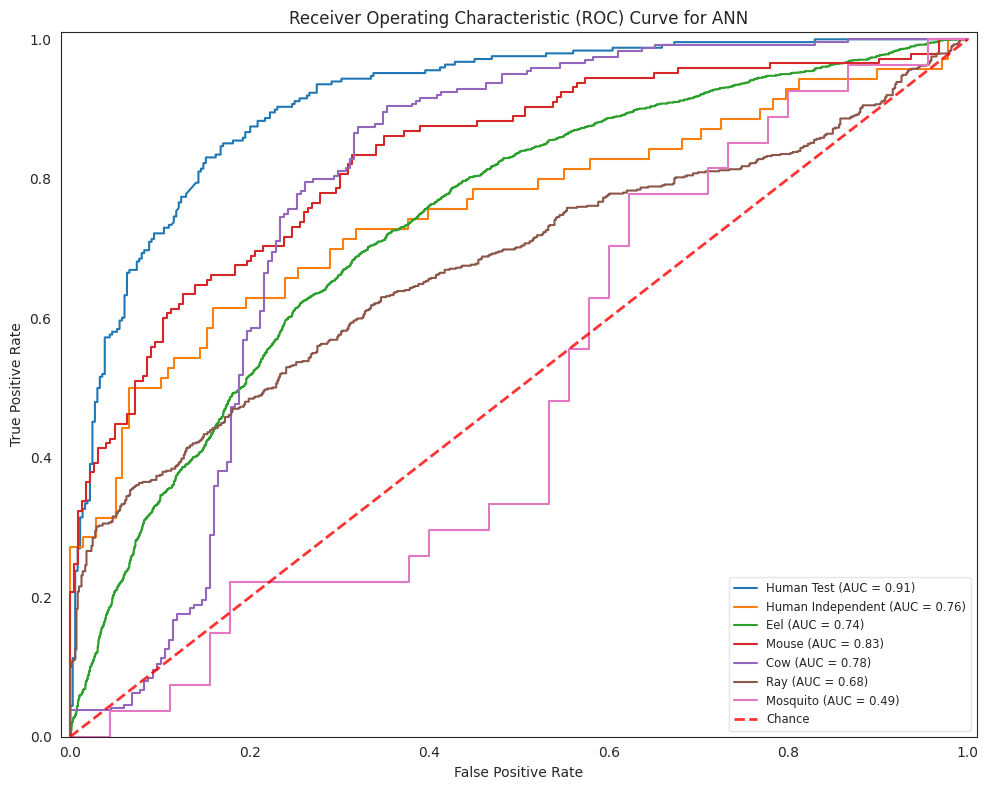

Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - CNN:
[273  91]
[ 37 211]
Model: CNN
Accuracy: 0.7908496732026143
Precision: 0.6986754966887417
Recall: 0.8508064516129032
F1 Score: 0.7672727272727273
ROC-AUC Score: 0.8654289259127969
Cohen's Kappa Score: 0.5806603571581517
MCC Score: 0.5899657522826677

Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 19ms/step
Confusion Matrix - CNN:
[90 48]
[22 48]
Model: CNN
Accuracy: 0.6634615384615384
Precision: 0.5
Recall: 0.6857142857142857
F1 Score: 0.5783132530120482
ROC-AUC Score: 0.7246376811594204
Cohen's Kappa Score: 0.3095599393019727
MCC Score: 0.32027051564938225

Evaluating dataset: Eel
Evaluating model: CNN
171/171 [==============================] - 0s 3ms/step
Confusion Matrix - CNN:
[2007 1368]
[ 745 1339]
Model: CNN
Accuracy: 0.6129327715698846
Precision: 0.49464351680827484
Recall: 0.6425143953934741
F1 

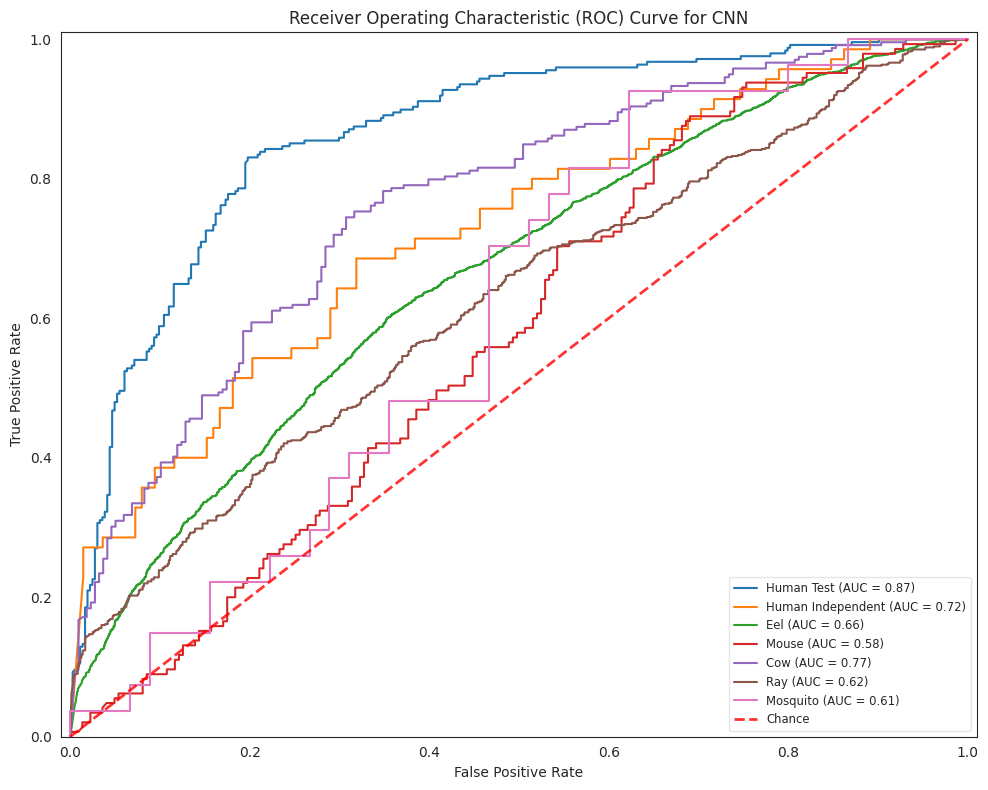

Evaluating dataset: Human Test
Evaluating model: LSTM
20/20 [==============================] - 0s 9ms/step
Confusion Matrix - LSTM:
[286  78]
[ 59 189]
Model: LSTM
Accuracy: 0.7761437908496732
Precision: 0.7078651685393258
Recall: 0.7620967741935484
F1 Score: 0.7339805825242719
ROC-AUC Score: 0.8496100673520028
Cohen's Kappa Score: 0.5412042813054042
MCC Score: 0.5423031787795484

Evaluating dataset: Human Independent
Evaluating model: LSTM
7/7 [==============================] - 0s 7ms/step
Confusion Matrix - LSTM:
[97 41]
[34 36]
Model: LSTM
Accuracy: 0.6394230769230769
Precision: 0.4675324675324675
Recall: 0.5142857142857142
F1 Score: 0.4897959183673469
ROC-AUC Score: 0.6435817805383024
Cohen's Kappa Score: 0.21196201252778335
MCC Score: 0.21253766756974804

Evaluating dataset: Eel
Evaluating model: LSTM
171/171 [==============================] - 1s 8ms/step
Confusion Matrix - LSTM:
[2333 1042]
[1079 1005]
Model: LSTM
Accuracy: 0.6114673017036087
Precision: 0.49096238397655106
Recall

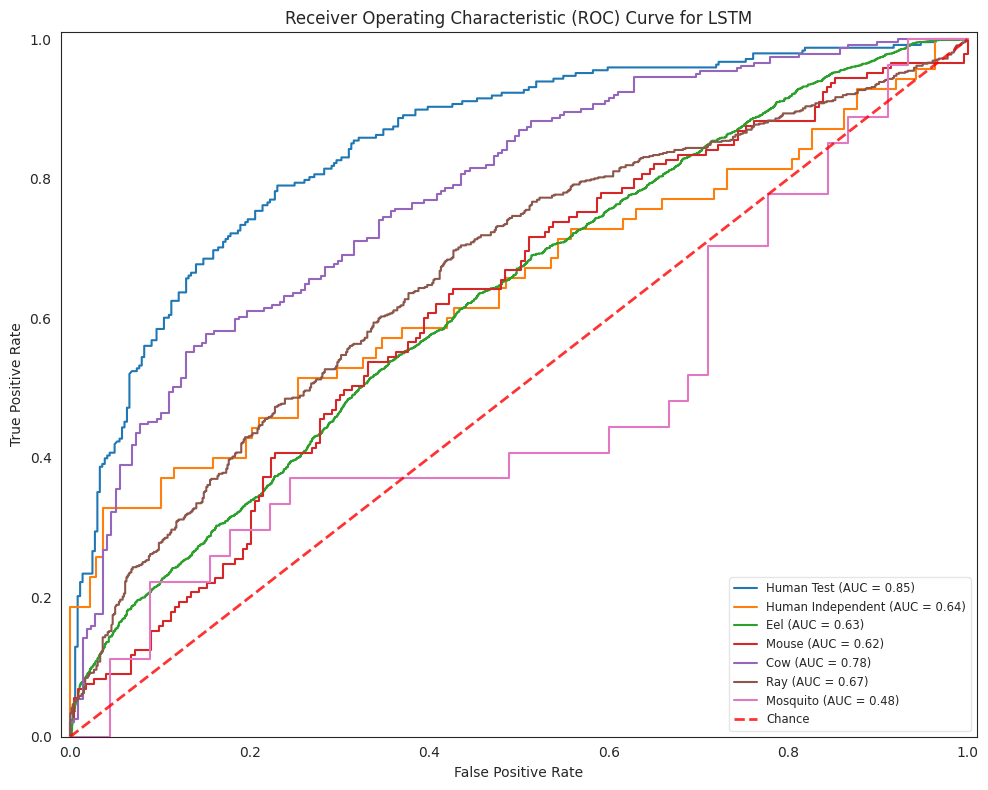

Evaluating dataset: Human Test
Evaluating model: GRU
20/20 [==============================] - 0s 8ms/step
Confusion Matrix - GRU:
[287  77]
[ 51 197]
Model: GRU
Accuracy: 0.7908496732026143
Precision: 0.718978102189781
Recall: 0.7943548387096774
F1 Score: 0.7547892720306512
ROC-AUC Score: 0.8506790588443814
Cohen's Kappa Score: 0.5732403573763347
MCC Score: 0.5754063464765942

Evaluating dataset: Human Independent
Evaluating model: GRU
7/7 [==============================] - 0s 7ms/step
Confusion Matrix - GRU:
[99 39]
[37 33]
Model: GRU
Accuracy: 0.6346153846153846
Precision: 0.4583333333333333
Recall: 0.4714285714285714
F1 Score: 0.46478873239436613
ROC-AUC Score: 0.6305383022774328
Cohen's Kappa Score: 0.1875
MCC Score: 0.1875428745686858

Evaluating dataset: Eel
Evaluating model: GRU
171/171 [==============================] - 1s 7ms/step
Confusion Matrix - GRU:
[2227 1148]
[ 936 1148]
Model: GRU
Accuracy: 0.6182450998351346
Precision: 0.5
Recall: 0.5508637236084453
F1 Score: 0.524200

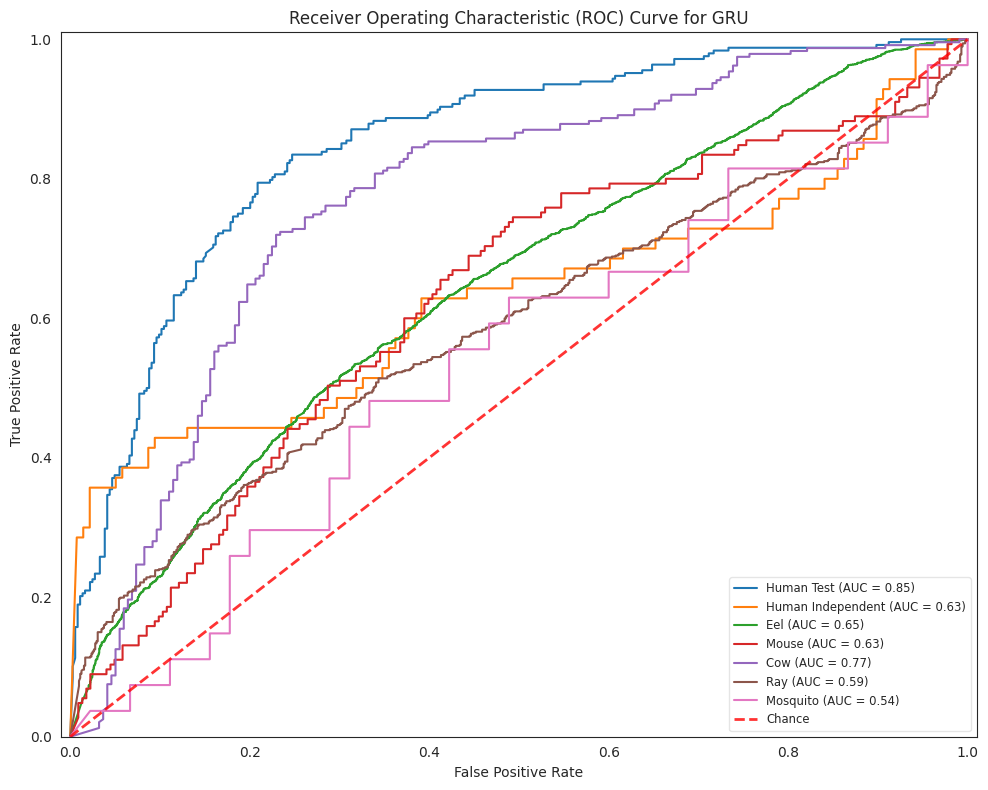

Evaluating dataset: Human Test
Evaluating model: Bi-LSTM
20/20 [==============================] - 0s 9ms/step
Confusion Matrix - Bi-LSTM:
[308  56]
[ 53 195]
Model: Bi-LSTM
Accuracy: 0.8218954248366013
Precision: 0.7768924302788844
Recall: 0.7862903225806451
F1 Score: 0.7815631262525049
ROC-AUC Score: 0.8912896579227225
Cohen's Kappa Score: 0.6312274727461691
MCC Score: 0.6312599886691046

Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
7/7 [==============================] - 0s 9ms/step
Confusion Matrix - Bi-LSTM:
[99 39]
[25 45]
Model: Bi-LSTM
Accuracy: 0.6923076923076923
Precision: 0.5357142857142857
Recall: 0.6428571428571429
F1 Score: 0.5844155844155844
ROC-AUC Score: 0.693064182194617
Cohen's Kappa Score: 0.3433307024467246
MCC Score: 0.3469286731455157

Evaluating dataset: Eel
Evaluating model: Bi-LSTM
171/171 [==============================] - 2s 9ms/step
Confusion Matrix - Bi-LSTM:
[2500  875]
[ 957 1127]
Model: Bi-LSTM
Accuracy: 0.6644074006228247
Precision: 0.

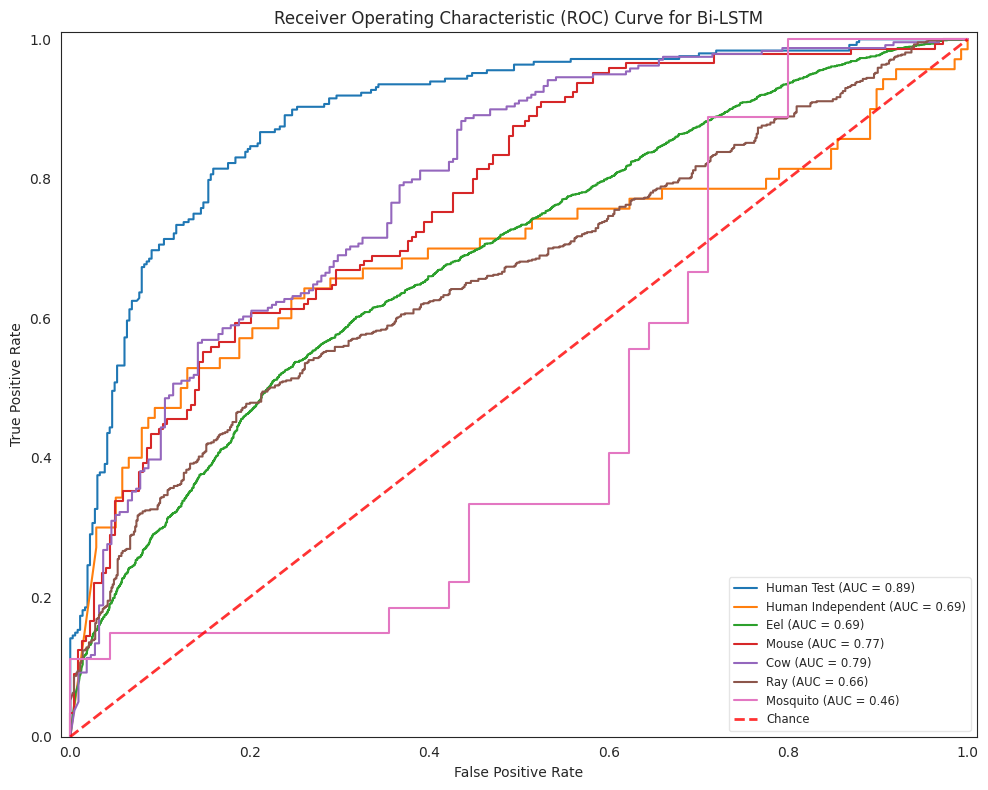

                                                                 ANN  \
Human Test         {'Accuracy': 0.8316993464052288, 'Precision': ...   
Human Independent  {'Accuracy': 0.7163461538461539, 'Precision': ...   
Eel                {'Accuracy': 0.6873053672833852, 'Precision': ...   
Mouse              {'Accuracy': 0.7418478260869565, 'Precision': ...   
Cow                {'Accuracy': 0.7658643326039387, 'Precision': ...   
Ray                {'Accuracy': 0.6415362731152204, 'Precision': ...   
Mosquito           {'Accuracy': 0.4583333333333333, 'Precision': ...   

                                                                 CNN  \
Human Test         {'Accuracy': 0.7908496732026143, 'Precision': ...   
Human Independent  {'Accuracy': 0.6634615384615384, 'Precision': ...   
Eel                {'Accuracy': 0.6129327715698846, 'Precision': ...   
Mouse              {'Accuracy': 0.5516304347826086, 'Precision': ...   
Cow                {'Accuracy': 0.7199124726477024, 'Precision'

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

# Define a function to plot ROC AUC curve
def plot_roc_auc(y_true, y_score, model_name, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
all_results = {}
confusion_matrices = {}

for model_name in models.keys():
    plt.figure(figsize=(10, 8))

    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.X)
        y = dataset.y

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        model = models[model_name]
        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Calculate the confusion matrix
        confusion = confusion_matrix(y, y_pred)

        # Store confusion matrix
        confusion_matrices[(dataset_name, model_name)] = confusion

        # Print the confusion matrix as text
        print_confusion_matrix(confusion, model_name)

        # Print evaluation metrics
        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("ROC-AUC Score:", roc_auc)
        print("Cohen's Kappa Score:", cohen_kappa)
        print("MCC Score:", mcc)
        print()

        # Plot ROC-AUC curve
        plot_roc_auc(y, y_pred_prob[:, 1], model_name, dataset_name)

        # Store results
        if model_name not in all_results:
            all_results[model_name] = {}
        all_results[model_name][dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right", fontsize='small', fancybox=True, framealpha=0.5)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'roc_auc_curve_{model_name}.png')
    plt.show()
    plt.close()

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(all_results)
print(results_df)

# Save results to Excel
results_df.to_excel('deep_learning_evaluation_results.xlsx', index=True)

# Save confusion matrices to a separate Excel file
with pd.ExcelWriter('confusion_matrices.xlsx') as writer:
    for (dataset_name, model_name), confusion_matrix in confusion_matrices.items():
        df_confusion = pd.DataFrame(confusion_matrix)
        df_confusion.to_excel(writer, sheet_name=f'{dataset_name}_{model_name}_confusion_matrix', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef


datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_HumanIndependent,
    'Eel': dataset_eel,
    'Mouse': dataset_mouse,
    'Cow': dataset_cow,
    'Ray': dataset_ray,
    'Mosquito': dataset_mosquito
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
    model_results = {}
    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()

        # Assuming data.X is a 2D array (matrix)
        X = scaler.fit_transform(dataset.X)
        y = dataset.y

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Store results
        model_results[dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Create a Pandas DataFrame from the results
    results_df = pd.DataFrame(model_results)

    # Save results to Excel
    results_df.to_excel(f'{model_name}_evaluation_results.xlsx', index=True)


Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 2ms/step
Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 2ms/step
Evaluating dataset: Mouse
Evaluating model: ANN
12/12 [==============================] - 0s 2ms/step
Evaluating dataset: Cow
Evaluating model: ANN
15/15 [==============================] - 0s 2ms/step
Evaluating dataset: Ray
Evaluating model: ANN
44/44 [==============================] - 0s 2ms/step
Evaluating dataset: Mosquito
Evaluating model: ANN
3/3 [==============================] - 0s 3ms/step
Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 2ms/step
Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 2ms/step
Evaluating dataset: Eel
Evaluating model: CNN
171/171 [=========

## References

* Jaeger, S., Fulle, S., & Turk, S. (2018). Mol2vec: Unsupervised Machine Learning Approach with Chemical Intuition. Journal of Chemical Information and Modeling, 58(1), 27–35. https://doi.org/10.1021/acs.jcim.7b00616
* https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html
*Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283

